In [1]:
# 1st STEP : Defining Success Score and Pre processing data for model

In [106]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [107]:
data = pd.read_csv("4 Leagues Data Final.csv")

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 100 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   league                        4335 non-null   object 
 1   season                        4335 non-null   int64  
 2   game                          4335 non-null   object 
 3   round                         4335 non-null   object 
 4   week                          4335 non-null   object 
 5   date                          4335 non-null   object 
 6   home_team                     4335 non-null   object 
 7   away_team                     4335 non-null   object 
 8   home_score                    4335 non-null   int64  
 9   away_score                    4335 non-null   int64  
 10  status                        4335 non-null   object 
 11  game_id                       4335 non-null   int64  
 12  url                           4335 non-null   object 
 13  te

In [109]:
pd.set_option("display.max.columns", None)

In [110]:
data.head()

,league,season,game,round,week,date,home_team,away_team,home_score,away_score,status,game_id,url,team_x,home_Expected goals (xG),home_xG non-penalty,home_xG on target (xGOT),home_xG open play,home_xG set play,home_Blocked shots,home_Hit woodwork,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Total shots,home_Accurate passes,home_Ball possession,home_Big chances,home_Big chances missed,home_Corners,home_Fouls committed,home_Accurate passes (%),home_Accurate crosses,home_Accurate long balls,home_Offsides,home_Opposition half,home_Own half,home_Passes,home_Throws,home_Accurate crosses (%),home_Accurate long balls (%),team_y,away_Expected goals (xG),away_xG non-penalty,away_xG on target (xGOT),away_xG open play,away_xG set play,away_Blocked shots,away_Hit woodwork,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Total shots,away_Accurate passes,away_Ball possession,away_Big chances,away_Big chances missed,away_Corners,away_Fouls committed,away_Accurate passes (%),away_Accurate crosses,away_Accurate long balls,away_Offsides,away_Opposition half,away_Own half,away_Passes,away_Throws,away_Accurate crosses (%),away_Accurate long balls (%),fifa_version,home_team_matched,away_team_matched,home_league_name,home_league_level,home_nationality_id,home_nationality_name,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_club_worth_eur,home_starting_xi_average_age,home_whole_team_average_age,away_league_name,away_league_level,away_nationality_id,away_nationality_name,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_club_worth_eur,away_starting_xi_average_age,away_whole_team_average_age
0,GER-Bundesliga,2021,2020-09-18 Bayern München-Schalke 04,1,1,2020-09-18 18:30:00+00:00,FC Bayern München,Schalke 04,8,0,FT,3399144,https://fotmob.com/matches/bayern-munchen-vs-s...,Bayern München,3.95,3.16,5.28,2.91,0.26,3.0,1.0,17.0,6.0,12.0,4.0,21.0,539.0,63.0,8.0,4.0,9.0,11.0,0.89,4.0,36.0,3.0,254.0,285.0,604.0,23.0,0.24,0.80,Schalke 04,0.20,0.20,0.03,0.17,0.03,2.0,0.0,3.0,2.0,1.0,2.0,5.0,268.0,37.0,0.0,0.0,2.0,12.0,0.74,0.0,18.0,3.0,91.0,177.0,361.0,15.0,0.00,0.31,21,FC Bayern München,Schalke 04,Bundesliga,1.0,21,Germany,84,91,84,82,10,10.0,2.900000e+09,26.82,25.23,2. Bundesliga,1.0,21,Germany,76,75,75,77,5,6.0,700100000.0,26.82,25.21
1,GER-Bundesliga,2021,2020-09-19 Borussia Dortmund-Borussia Möncheng...,1,1,2020-09-19 16:30:00+00:00,Borussia Dortmund,Borussia Mönchengladbach,3,0,FT,3399145,https://fotmob.com/matches/borussia-monchengla...,Borussia Dortmund,1.84,1.05,2.01,0.87,0.17,3.0,1.0,9.0,3.0,4.0,1.0,10.0,462.0,48.0,2.0,0.0,1.0,10.0,0.87,4.0,28.0,2.0,155.0,307.0,530.0,19.0,0.40,0.55,Borussia Mönchengladbach,0.65,0.65,0.29,0.57,0.07,4.0,0.0,4.0,2.0,2.0,4.0,8.0,515.0,52.0,1.0,1.0,3.0,9.0,0.88,3.0,27.0,2.0,249.0,266.0,585.0,18.0,0.25,0.71,21,Borussia Dortmund,Borussia Mönchengladbach,Bundesliga,1.0,21,Germany,82,85,81,81,8,9.0,1.300000e+09,25.64,24.23,Bundesliga,1.0,21,Germany,79,80,79,78,5,7.0,357900000.0,26.09,24.82
2,GER-Bundesliga,2021,2020-09-19 Eintracht Frankfurt-Arminia Bielefeld,1,1,2020-09-19 13:30:00+00:00,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,FT,3399148,https://fotmob.com/matches/eintracht-frankfurt...,Eintracht Frankfurt,2.31,2.31,2.49,1.68,0.63,6.0,1.0,12.0,6.0,6.0,6.0,18.0,425.0,62.0,3.0,2.0,14.0,14.0,0.80,10.0,37.0,2.0,197.0,228.0,533.0,22.0,0.29,0.55,Arminia Bielefeld,0.81,0.81,1.38,0.71,0.10,3.0,0.0,5.0,5.0,4.0,7.0,12.0,231.0,38.0,1.0,0.0,3.0,13.0,0.70,4.0,34.0,1.0,92.0,139.0,331.0,16.0,0.33,0.47,21,Eintracht Frankfurt,DSC Arminia Bielefeld,Bundesliga,1.0,21,Germany,77,78,76,76,5,6.0,2.468000e+08,28.27,25.26,3. Liga,1.0,21,Germany,71,72,71,70,1,1.0,39000000.0,25.64,24.55
3,GER-Bundesliga,2021,2020-09-19 FC Köln-Hoffenheim,1,1,2020-09-19 13:30:00+00:00,FC Köln,TSG Hoffenheim,2,3,FT,3399150,https://fotmob.com/matches/hoffenheim

# Pre Processing

In [111]:
# Calculate percentage for 'home_Own half' based on 'home_Passes'
data['home_Own half %'] = (data['home_Own half'] / data['home_Accurate passes']) * 100

# Calculate percentage for 'home_Opposition half' based on 'home_Passes'
data['home_Opposition half %'] = (data['home_Opposition half'] / data['home_Accurate passes']) * 100

# Calculate percentage for 'away_Own half' based on 'home_Passes'
data['away_Own half %'] = (data['away_Own half'] / data['away_Accurate passes']) * 100

# Calculate percentage for 'away_Opposition half' based on 'home_Passes'
data['away_Opposition half %'] = (data['away_Opposition half'] / data['away_Accurate passes']) * 100

In [112]:
# Calculate percentage of home_Expected goals (xG) to home_Total shots
data['home_xG %'] = (data['home_Expected goals (xG)'] / data['home_Total shots']) * 100

# Calculate percentage of away_Expected goals (xG) to away_Total shots
data['away_xG %'] = (data['away_Expected goals (xG)'] / data['away_Total shots']) * 100


In [113]:
# Calculate percentage of home_Shots inside box to home_Total shots
data['home_Shots inside box %'] = (data['home_Shots inside box'] / data['home_Total shots']) * 100

# Calculate percentage of away_Shots inside box to away_Total shots
data['away_Shots inside box %'] = (data['away_Shots inside box'] / data['away_Total shots']) * 100

# Calculate percentage of home_Shots inside box to home_Total shots
data['home_Shots outside box %'] = (data['home_Shots outside box'] / data['home_Total shots']) * 100

# Calculate percentage of away_Shots inside box to away_Total shots
data['away_Shots outside box %'] = (data['away_Shots outside box'] / data['away_Total shots']) * 100


In [114]:
pd.set_option('display.max_columns', None)

In [115]:
data.head()

,league,season,game,round,week,date,home_team,away_team,home_score,away_score,status,game_id,url,team_x,home_Expected goals (xG),home_xG non-penalty,home_xG on target (xGOT),home_xG open play,home_xG set play,home_Blocked shots,home_Hit woodwork,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Total shots,home_Accurate passes,home_Ball possession,home_Big chances,home_Big chances missed,home_Corners,home_Fouls committed,home_Accurate passes (%),home_Accurate crosses,home_Accurate long balls,home_Offsides,home_Opposition half,home_Own half,home_Passes,home_Throws,home_Accurate crosses (%),home_Accurate long balls (%),team_y,away_Expected goals (xG),away_xG non-penalty,away_xG on target (xGOT),away_xG open play,away_xG set play,away_Blocked shots,away_Hit woodwork,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Total shots,away_Accurate passes,away_Ball possession,away_Big chances,away_Big chances missed,away_Corners,away_Fouls committed,away_Accurate passes (%),away_Accurate crosses,away_Accurate long balls,away_Offsides,away_Opposition half,away_Own half,away_Passes,away_Throws,away_Accurate crosses (%),away_Accurate long balls (%),fifa_version,home_team_matched,away_team_matched,home_league_name,home_league_level,home_nationality_id,home_nationality_name,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_club_worth_eur,home_starting_xi_average_age,home_whole_team_average_age,away_league_name,away_league_level,away_nationality_id,away_nationality_name,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_club_worth_eur,away_starting_xi_average_age,away_whole_team_average_age,home_Own half %,home_Opposition half %,away_Own half %,away_Opposition half %,home_xG %,away_xG %,home_Shots inside box %,away_Shots inside box %,home_Shots outside box %,away_Shots outside box %
0,GER-Bundesliga,2021,2020-09-18 Bayern München-Schalke 04,1,1,2020-09-18 18:30:00+00:00,FC Bayern München,Schalke 04,8,0,FT,3399144,https://fotmob.com/matches/bayern-munchen-vs-s...,Bayern München,3.95,3.16,5.28,2.91,0.26,3.0,1.0,17.0,6.0,12.0,4.0,21.0,539.0,63.0,8.0,4.0,9.0,11.0,0.89,4.0,36.0,3.0,254.0,285.0,604.0,23.0,0.24,0.80,Schalke 04,0.20,0.20,0.03,0.17,0.03,2.0,0.0,3.0,2.0,1.0,2.0,5.0,268.0,37.0,0.0,0.0,2.0,12.0,0.74,0.0,18.0,3.0,91.0,177.0,361.0,15.0,0.00,0.31,21,FC Bayern München,Schalke 04,Bundesliga,1.0,21,Germany,84,91,84,82,10,10.0,2.900000e+09,26.82,25.23,2. Bundesliga,1.0,21,Germany,76,75,75,77,5,6.0,700100000.0,26.82,25.21,52.875696,47.124304,66.044776,33.955224,18.809524,4.000000,80.952381,60.000000,19.047619,40.000000
1,GER-Bundesliga,2021,2020-09-19 Borussia Dortmund-Borussia Möncheng...,1,1,2020-09-19 16:30:00+00:00,Borussia Dortmund,Borussia Mönchengladbach,3,0,FT,3399145,https://fotmob.com/matches/borussia-monchengla...,Borussia Dortmund,1.84,1.05,2.01,0.87,0.17,3.0,1.0,9.0,3.0,4.0,1.0,10.0,462.0,48.0,2.0,0.0,1.0,10.0,0.87,4.0,28.0,2.0,155.0,307.0,530.0,19.0,0.40,0.55,Borussia Mönchengladbach,0.65,0.65,0.29,0.57,0.07,4.0,0.0,4.0,2.0,2.0,4.0,8.0,515.0,52.0,1.0,1.0,3.0,9.0,0.88,3.0,27.0,2.0,249.0,266.0,585.0,18.0,0.25,0.71,21,Borussia Dortmund,Borussia Mönchengladbach,Bundesliga,1.0,21,Germany,82,85,81,81,8,9.0,1.300000e+09,25.64,24.23,Bundesliga,1.0,21,Germany,79,80,79,78,5,7.0,357900000.0,26.09,24.82,66.450216,33.549784,51.650485,48.349515,18.400000,8.125000,90.000000,50.000000,10.000000,50.000000
2,GER-Bundesliga,2021,2020-09-19 Eintracht Frankfurt-Arminia Bielefeld,1,1,2020-09-19 13:30:00+00:00,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,FT,3399148,https://fotmob.com/matches/eintracht-frankfurt...,Eintracht Frankfurt,2.31,2.31,2.49,1.68,0.63,6.0,1.0,12.0,6.0,6.0,6.0,18.0,425.0,62.0,3.0,2.0,14.0,14.0,0.80,10.0,37.0,2.0,197.0,228.0,533.0,22.0,0.29,0.55,Arminia Bielefeld,0.81,0.81,1.38,0.71,0.10,3.0,0.0,5.0,5.0,4.0,7.0,12.0,231.0,38.0,1.0,0.0,

In [116]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Sample DataFrame initialization for demonstration
# data = pd.DataFrame(...)

# Define the general columns
general_columns = [
    'league', 'season', 'game', 'round', 'week', 'date', 
    'home_team', 'away_team', 'home_score', 'away_score', 
    'status', 'game_id', 'url'
]

# Define home columns
home_columns = [
    'team_x', 'home_Expected goals (xG)', 'home_xG non-penalty', 
    'home_xG on target (xGOT)', 'home_xG open play', 
    'home_xG set play', 'home_Blocked shots', 
    'home_Hit woodwork', 'home_Shots inside box', 
    'home_Shots off target', 'home_Shots on target', 
    'home_Shots outside box', 'home_Total shots', 
    'home_Accurate passes', 'home_Ball possession', 
    'home_Big chances', 'home_Big chances missed', 
    'home_Corners', 'home_Fouls committed', 
    'home_Accurate passes (%)', 'home_Accurate crosses', 
    'home_Accurate long balls', 'home_Offsides', 
    'home_Opposition half', 'home_Own half', 
    'home_Passes', 'home_Throws', 
    'home_Accurate crosses (%)', 'home_Accurate long balls (%)',
    'home_league_level', 'home_nationality_id', 
    'home_nationality_name', 'home_overall', 
    'home_attack', 'home_midfield', 'home_defence', 
    'home_international_prestige', 'home_domestic_prestige', 
    'home_club_worth_eur', 'home_starting_xi_average_age', 
    'home_whole_team_average_age'
]

# Define away columns
away_columns = [
    'team_y', 'away_Expected goals (xG)', 'away_xG non-penalty', 
    'away_xG on target (xGOT)', 'away_xG open play', 
    'away_xG set play', 'away_Blocked shots', 
    'away_Hit woodwork', 'away_Shots inside box', 
    'away_Shots off target', 'away_Shots on target', 
    'away_Shots outside box', 'away_Total shots', 
    'away_Accurate passes', 'away_Ball possession', 
    'away_Big chances', 'away_Big chances missed', 
    'away_Corners', 'away_Fouls committed', 
    'away_Accurate passes (%)', 'away_Accurate crosses', 
    'away_Accurate long balls', 'away_Offsides', 
    'away_Opposition half', 'away_Own half', 
    'away_Passes', 'away_Throws', 
    'away_Accurate crosses (%)', 'away_Accurate long balls (%)',
    'away_league_level', 'away_nationality_id', 
    'away_nationality_name', 'away_overall', 
    'away_attack', 'away_midfield', 'away_defence', 
    'away_international_prestige', 'away_domestic_prestige', 
    'away_club_worth_eur', 'away_starting_xi_average_age', 
    'away_whole_team_average_age'
]

# Combine the columns in the desired order
ordered_columns = general_columns + home_columns + away_columns

# Reorder the DataFrame
data = data[ordered_columns]

# Convert float values to one decimal place
float_columns = data.select_dtypes(include=['float']).columns
data[float_columns] = data[float_columns].round(1)


In [117]:
data.head()

,league,season,game,round,week,date,home_team,away_team,home_score,away_score,status,game_id,url,team_x,home_Expected goals (xG),home_xG non-penalty,home_xG on target (xGOT),home_xG open play,home_xG set play,home_Blocked shots,home_Hit woodwork,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Total shots,home_Accurate passes,home_Ball possession,home_Big chances,home_Big chances missed,home_Corners,home_Fouls committed,home_Accurate passes (%),home_Accurate crosses,home_Accurate long balls,home_Offsides,home_Opposition half,home_Own half,home_Passes,home_Throws,home_Accurate crosses (%),home_Accurate long balls (%),home_league_level,home_nationality_id,home_nationality_name,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_club_worth_eur,home_starting_xi_average_age,home_whole_team_average_age,team_y,away_Expected goals (xG),away_xG non-penalty,away_xG on target (xGOT),away_xG open play,away_xG set play,away_Blocked shots,away_Hit woodwork,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Total shots,away_Accurate passes,away_Ball possession,away_Big chances,away_Big chances missed,away_Corners,away_Fouls committed,away_Accurate passes (%),away_Accurate crosses,away_Accurate long balls,away_Offsides,away_Opposition half,away_Own half,away_Passes,away_Throws,away_Accurate crosses (%),away_Accurate long balls (%),away_league_level,away_nationality_id,away_nationality_name,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_club_worth_eur,away_starting_xi_average_age,away_whole_team_average_age
0,GER-Bundesliga,2021,2020-09-18 Bayern München-Schalke 04,1,1,2020-09-18 18:30:00+00:00,FC Bayern München,Schalke 04,8,0,FT,3399144,https://fotmob.com/matches/bayern-munchen-vs-s...,Bayern München,4.0,3.2,5.3,2.9,0.3,3.0,1.0,17.0,6.0,12.0,4.0,21.0,539.0,63.0,8.0,4.0,9.0,11.0,0.9,4.0,36.0,3.0,254.0,285.0,604.0,23.0,0.2,0.8,1.0,21,Germany,84,91,84,82,10,10.0,2.900000e+09,26.8,25.2,Schalke 04,0.2,0.2,0.0,0.2,0.0,2.0,0.0,3.0,2.0,1.0,2.0,5.0,268.0,37.0,0.0,0.0,2.0,12.0,0.7,0.0,18.0,3.0,91.0,177.0,361.0,15.0,0.0,0.3,1.0,21,Germany,76,75,75,77,5,6.0,700100000.0,26.8,25.2
1,GER-Bundesliga,2021,2020-09-19 Borussia Dortmund-Borussia Möncheng...,1,1,2020-09-19 16:30:00+00:00,Borussia Dortmund,Borussia Mönchengladbach,3,0,FT,3399145,https://fotmob.com/matches/borussia-monchengla...,Borussia Dortmund,1.8,1.0,2.0,0.9,0.2,3.0,1.0,9.0,3.0,4.0,1.0,10.0,462.0,48.0,2.0,0.0,1.0,10.0,0.9,4.0,28.0,2.0,155.0,307.0,530.0,19.0,0.4,0.6,1.0,21,Germany,82,85,81,81,8,9.0,1.300000e+09,25.6,24.2,Borussia Mönchengladbach,0.6,0.6,0.3,0.6,0.1,4.0,0.0,4.0,2.0,2.0,4.0,8.0,515.0,52.0,1.0,1.0,3.0,9.0,0.9,3.0,27.0,2.0,249.0,266.0,585.0,18.0,0.2,0.7,1.0,21,Germany,79,80,79,78,5,7.0,357900000.0,26.1,24.8
2,GER-Bundesliga,2021,2020-09-19 Eintracht Frankfurt-Arminia Bielefeld,1,1,2020-09-19 13:30:00+00:00,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,FT,3399148,https://fotmob.com/matches/eintracht-frankfurt...,Eintracht Frankfurt,2.3,2.3,2.5,1.7,0.6,6.0,1.0,12.0,6.0,6.0,6.0,18.0,425.0,62.0,3.0,2.0,14.0,14.0,0.8,10.0,37.0,2.0,197.0,228.0,533.0,22.0,0.3,0.6,1.0,21,Germany,77,78,76,76,5,6.0,2.468000e+08,28.3,25.3,Arminia Bielefeld,0.8,0.8,1.4,0.7,0.1,3.0,0.0,5.0,5.0,4.0,7.0,12.0,231.0,38.0,1.0,0.0,3.0,13.0,0.7,4.0,34.0,1.0,92.0,139.0,331.0,16.0,0.3,0.5,1.0,21,Germany,71,72,71,70,1,1.0,39000000.0,25.6,24.6
3,GER-Bundesliga,2021,2020-09-19 FC Köln-Hoffenheim,1,1,2020-09-19 13:30:00+00:00,FC Köln,TSG Hoffenheim,2,3,FT,3399150,https://fotmob.com/matches/hoffenheim-vs-fc-ko...,FC Köln,2.7,2.7,2.6,1.9,0.8,1.0,0.0,10.0,6.0,6.0,3.0,13.0,356.0,49.0,4.0,2.0,1.0,12.0,0.8,6.0,33.0,0.0,139.0,217.0,446.0,15.0,0.4,0.5,1.0,21,Germany,74,75,73,72,3,4.0,1.685000e+08,24.7,24.3,Hoffenheim,2.6,1.8,3.2,1.6,0.2,1.0,0.0,8.0,5.0,7.0,5.0,13.0,358.0,51.0,4.0,2.0,6.0,13.0,0.8,3.0,31.0,2.0,137.0,221.0,456.0,23.0,0

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 95 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   league                        4335 non-null   object 
 1   season                        4335 non-null   int64  
 2   game                          4335 non-null   object 
 3   round                         4335 non-null   object 
 4   week                          4335 non-null   object 
 5   date                          4335 non-null   object 
 6   home_team                     4335 non-null   object 
 7   away_team                     4335 non-null   object 
 8   home_score                    4335 non-null   int64  
 9   away_score                    4335 non-null   int64  
 10  status                        4335 non-null   object 
 11  game_id                       4335 non-null   int64  
 12  url                           4335 non-null   object 
 13  tea

In [119]:
df = data

In [120]:
data = df

In [121]:
data.head()

,league,season,game,round,week,date,home_team,away_team,home_score,away_score,status,game_id,url,team_x,home_Expected goals (xG),home_xG non-penalty,home_xG on target (xGOT),home_xG open play,home_xG set play,home_Blocked shots,home_Hit woodwork,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Total shots,home_Accurate passes,home_Ball possession,home_Big chances,home_Big chances missed,home_Corners,home_Fouls committed,home_Accurate passes (%),home_Accurate crosses,home_Accurate long balls,home_Offsides,home_Opposition half,home_Own half,home_Passes,home_Throws,home_Accurate crosses (%),home_Accurate long balls (%),home_league_level,home_nationality_id,home_nationality_name,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_club_worth_eur,home_starting_xi_average_age,home_whole_team_average_age,team_y,away_Expected goals (xG),away_xG non-penalty,away_xG on target (xGOT),away_xG open play,away_xG set play,away_Blocked shots,away_Hit woodwork,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Total shots,away_Accurate passes,away_Ball possession,away_Big chances,away_Big chances missed,away_Corners,away_Fouls committed,away_Accurate passes (%),away_Accurate crosses,away_Accurate long balls,away_Offsides,away_Opposition half,away_Own half,away_Passes,away_Throws,away_Accurate crosses (%),away_Accurate long balls (%),away_league_level,away_nationality_id,away_nationality_name,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_club_worth_eur,away_starting_xi_average_age,away_whole_team_average_age
0,GER-Bundesliga,2021,2020-09-18 Bayern München-Schalke 04,1,1,2020-09-18 18:30:00+00:00,FC Bayern München,Schalke 04,8,0,FT,3399144,https://fotmob.com/matches/bayern-munchen-vs-s...,Bayern München,4.0,3.2,5.3,2.9,0.3,3.0,1.0,17.0,6.0,12.0,4.0,21.0,539.0,63.0,8.0,4.0,9.0,11.0,0.9,4.0,36.0,3.0,254.0,285.0,604.0,23.0,0.2,0.8,1.0,21,Germany,84,91,84,82,10,10.0,2.900000e+09,26.8,25.2,Schalke 04,0.2,0.2,0.0,0.2,0.0,2.0,0.0,3.0,2.0,1.0,2.0,5.0,268.0,37.0,0.0,0.0,2.0,12.0,0.7,0.0,18.0,3.0,91.0,177.0,361.0,15.0,0.0,0.3,1.0,21,Germany,76,75,75,77,5,6.0,700100000.0,26.8,25.2
1,GER-Bundesliga,2021,2020-09-19 Borussia Dortmund-Borussia Möncheng...,1,1,2020-09-19 16:30:00+00:00,Borussia Dortmund,Borussia Mönchengladbach,3,0,FT,3399145,https://fotmob.com/matches/borussia-monchengla...,Borussia Dortmund,1.8,1.0,2.0,0.9,0.2,3.0,1.0,9.0,3.0,4.0,1.0,10.0,462.0,48.0,2.0,0.0,1.0,10.0,0.9,4.0,28.0,2.0,155.0,307.0,530.0,19.0,0.4,0.6,1.0,21,Germany,82,85,81,81,8,9.0,1.300000e+09,25.6,24.2,Borussia Mönchengladbach,0.6,0.6,0.3,0.6,0.1,4.0,0.0,4.0,2.0,2.0,4.0,8.0,515.0,52.0,1.0,1.0,3.0,9.0,0.9,3.0,27.0,2.0,249.0,266.0,585.0,18.0,0.2,0.7,1.0,21,Germany,79,80,79,78,5,7.0,357900000.0,26.1,24.8
2,GER-Bundesliga,2021,2020-09-19 Eintracht Frankfurt-Arminia Bielefeld,1,1,2020-09-19 13:30:00+00:00,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,FT,3399148,https://fotmob.com/matches/eintracht-frankfurt...,Eintracht Frankfurt,2.3,2.3,2.5,1.7,0.6,6.0,1.0,12.0,6.0,6.0,6.0,18.0,425.0,62.0,3.0,2.0,14.0,14.0,0.8,10.0,37.0,2.0,197.0,228.0,533.0,22.0,0.3,0.6,1.0,21,Germany,77,78,76,76,5,6.0,2.468000e+08,28.3,25.3,Arminia Bielefeld,0.8,0.8,1.4,0.7,0.1,3.0,0.0,5.0,5.0,4.0,7.0,12.0,231.0,38.0,1.0,0.0,3.0,13.0,0.7,4.0,34.0,1.0,92.0,139.0,331.0,16.0,0.3,0.5,1.0,21,Germany,71,72,71,70,1,1.0,39000000.0,25.6,24.6
3,GER-Bundesliga,2021,2020-09-19 FC Köln-Hoffenheim,1,1,2020-09-19 13:30:00+00:00,FC Köln,TSG Hoffenheim,2,3,FT,3399150,https://fotmob.com/matches/hoffenheim-vs-fc-ko...,FC Köln,2.7,2.7,2.6,1.9,0.8,1.0,0.0,10.0,6.0,6.0,3.0,13.0,356.0,49.0,4.0,2.0,1.0,12.0,0.8,6.0,33.0,0.0,139.0,217.0,446.0,15.0,0.4,0.5,1.0,21,Germany,74,75,73,72,3,4.0,1.685000e+08,24.7,24.3,Hoffenheim,2.6,1.8,3.2,1.6,0.2,1.0,0.0,8.0,5.0,7.0,5.0,13.0,358.0,51.0,4.0,2.0,6.0,13.0,0.8,3.0,31.0,2.0,137.0,221.0,456.0,23.0,0

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 95 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   league                        4335 non-null   object 
 1   season                        4335 non-null   int64  
 2   game                          4335 non-null   object 
 3   round                         4335 non-null   object 
 4   week                          4335 non-null   object 
 5   date                          4335 non-null   object 
 6   home_team                     4335 non-null   object 
 7   away_team                     4335 non-null   object 
 8   home_score                    4335 non-null   int64  
 9   away_score                    4335 non-null   int64  
 10  status                        4335 non-null   object 
 11  game_id                       4335 non-null   int64  
 12  url                           4335 non-null   object 
 13  tea

# Tactical Approach

In [123]:
import pandas as pd

# Possession Play
data['home_possession_play'] = (
    data["home_xG open play"] * 0.2 +
    data['home_Ball possession'] * 0.2 +
    data['home_Accurate passes'] * 0.2 +
    data['home_Passes'] * 0.2 +
    data['home_Accurate passes (%)'] * 0.2 +
    data['home_Own half'] * 0.2
)

data['away_possession_play'] = (
    data["away_xG open play"] * 0.2 +
    data['away_Ball possession'] * 0.2 +
    data['away_Accurate passes'] * 0.2 +
    data['away_Passes'] * 0.2 +
    data['away_Accurate passes (%)'] * 0.2 +
    data['away_Own half'] * 0.2 
)

# Counter-Attack
data['home_counter_attack'] = (
    data['away_Ball possession'] * 0.2 +
    data['home_Big chances'] / data["home_Total shots"] * 0.2 +
    data['home_Accurate long balls'] * 0.2 +
    data['home_Opposition half'] * 0.2 +
    data['home_Offsides'] * 0.2 +
    data["home_Shots inside box"] * 0.2 +  
    data["home_Shots on target"] / data["home_Total shots"] * 0.2
)

data['away_counter_attack'] = (
    data['home_Ball possession'] * 0.2 +
    data['away_Big chances'] / data["away_Total shots"] * 0.2 +
    data['away_Accurate long balls'] * 0.2 +
    data['away_Opposition half'] * 0.2 +
    data['away_Offsides'] * 0.2 +
    data["away_Shots inside box"] * 0.2 + 
    data["away_Shots on target"] / data["away_Total shots"] * 0.2
)

# High Press
data['home_high_press'] = (
    data['home_Fouls committed'] * 0.2 +
    data['home_Opposition half'] * 0.2 +
    data['home_Shots inside box'] * 0.2 +
    data['home_Corners'] * 0.2 +
    (data["home_Throws"] + data["away_Throws"]) * 0.2  
)

data['away_high_press'] = (
    data['away_Fouls committed'] * 0.2 +
    data['away_Opposition half'] * 0.2 +
    data['away_Shots inside box'] * 0.2 +
    data['away_Corners'] * 0.2 +
    (data["home_Throws"] + data["away_Throws"]) * 0.2  
)

# Direct Play
data['home_direct_play'] = (
    data['home_Accurate long balls'] * 0.3 +
    data['home_Shots inside box'] * 0.25 +
    data['home_Big chances'] * 0.25 +
    data['home_Offsides'] * 0.2
)

data['away_direct_play'] = (
    data['away_Accurate long balls'] * 0.3 +
    data['away_Shots inside box'] * 0.25 +
    data['away_Big chances'] * 0.25 +
    data['away_Offsides'] * 0.2
)

# Wing Play
data['home_wing_play'] = (
    data['home_Accurate crosses'] * 0.4 +
    data['home_Shots inside box'] * 0.3 +
    data['home_Corners'] * 0.2 +
    (data["home_Throws"] + data["away_Throws"]) * 0.1  
)

data['away_wing_play'] = (
    data['away_Accurate crosses'] * 0.4 +
    data['away_Shots inside box'] * 0.3 +
    data['away_Corners'] * 0.2 +
    (data["home_Throws"] + data["away_Throws"]) * 0.1  
)

# Set Piece Focus
data['home_set_piece_focus'] = (
    data['home_xG set play'] * 0.3 +
    data['home_Corners'] * 0.3 +
    data['home_Accurate crosses'] * 0.2 
)

data['away_set_piece_focus'] = (
    data['away_xG set play'] * 0.3 +
    data['away_Corners'] * 0.3 +
    data['away_Accurate crosses'] * 0.2 
)

# Creative Playmaking
data['home_creative_playmaking'] = (
    data['home_Accurate passes (%)'] * 0.3 +
    data['home_Big chances'] * 0.3 +
    data['home_Accurate long balls'] * 0.2 +
    data['home_Opposition half'] * 0.2
)

data['away_creative_playmaking'] = (
    data['away_Accurate passes (%)'] * 0.3 +
    data['away_Big chances'] * 0.3 +
    data['away_Accurate long balls'] * 0.2 +
    data['away_Opposition half'] * 0.2
)

# Playing Out from the Back
data['home_playing_out_back'] = (
    data['home_Own half'] * 0.4 +
    data['home_Accurate passes'] * 0.3 +
    data['home_Accurate long balls'] * 0.3
)

data['away_playing_out_back'] = (
    data['away_Own half'] * 0.4 +
    data['away_Accurate passes'] * 0.3 +
    data['away_Accurate long balls'] * 0.3
)

# Low Block 
data['home_low_block'] = (
    data['home_Blocked shots'] * 0.4 +
    data['home_Own half'] * 0.4 +
    data['home_Fouls committed'] * 0.2 +
    data["away_Shots outside box"] * 0.2
)

data['away_low_block'] = (
    data['away_Blocked shots'] * 0.25 +
    data['away_Own half'] * 0.25 +
    data['away_Fouls committed'] * 0.25 +
    data["home_Shots outside box"] * 0.25
)

# High Defensive Line
data['home_high_defensive_line'] = (
    data['away_Offsides'] * 0.25 +
    data['home_Opposition half'] * 0.25 +
    data['home_Fouls committed'] * 0.25 +
    data["away_Shots inside box"] * 0.25
)

data['away_high_defensive_line'] = (
    data['home_Offsides'] * 0.25 +
    data['away_Opposition half'] * 0.25 +
    data['away_Fouls committed'] * 0.25 +
    data["away_Shots inside box"] * 0.25
)

tactics_columns = [
    'possession_play', 'counter_attack', 'high_press', 'direct_play',
    'wing_play', 'set_piece_focus', 'creative_playmaking', 'playing_out_back', 
    'low_block', 'high_defensive_line',
]


In [124]:
data.head()

,league,season,game,round,week,date,home_team,away_team,home_score,away_score,status,game_id,url,team_x,home_Expected goals (xG),home_xG non-penalty,home_xG on target (xGOT),home_xG open play,home_xG set play,home_Blocked shots,home_Hit woodwork,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Total shots,home_Accurate passes,home_Ball possession,home_Big chances,home_Big chances missed,home_Corners,home_Fouls committed,home_Accurate passes (%),home_Accurate crosses,home_Accurate long balls,home_Offsides,home_Opposition half,home_Own half,home_Passes,home_Throws,home_Accurate crosses (%),home_Accurate long balls (%),home_league_level,home_nationality_id,home_nationality_name,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_club_worth_eur,home_starting_xi_average_age,home_whole_team_average_age,team_y,away_Expected goals (xG),away_xG non-penalty,away_xG on target (xGOT),away_xG open play,away_xG set play,away_Blocked shots,away_Hit woodwork,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Total shots,away_Accurate passes,away_Ball possession,away_Big chances,away_Big chances missed,away_Corners,away_Fouls committed,away_Accurate passes (%),away_Accurate crosses,away_Accurate long balls,away_Offsides,away_Opposition half,away_Own half,away_Passes,away_Throws,away_Accurate crosses (%),away_Accurate long balls (%),away_league_level,away_nationality_id,away_nationality_name,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_club_worth_eur,away_starting_xi_average_age,away_whole_team_average_age,home_possession_play,away_possession_play,home_counter_attack,away_counter_attack,home_high_press,away_high_press,home_direct_play,away_direct_play,home_wing_play,away_wing_play,home_set_piece_focus,away_set_piece_focus,home_creative_playmaking,away_creative_playmaking,home_playing_out_back,away_playing_out_back,home_low_block,away_low_block,home_high_defensive_line,away_high_defensive_line
0,GER-Bundesliga,2021,2020-09-18 Bayern München-Schalke 04,1,1,2020-09-18 18:30:00+00:00,FC Bayern München,Schalke 04,8,0,FT,3399144,https://fotmob.com/matches/bayern-munchen-vs-s...,Bayern München,4.0,3.2,5.3,2.9,0.3,3.0,1.0,17.0,6.0,12.0,4.0,21.0,539.0,63.0,8.0,4.0,9.0,11.0,0.9,4.0,36.0,3.0,254.0,285.0,604.0,23.0,0.2,0.8,1.0,21,Germany,84,91,84,82,10,10.0,2.900000e+09,26.8,25.2,Schalke 04,0.2,0.2,0.0,0.2,0.0,2.0,0.0,3.0,2.0,1.0,2.0,5.0,268.0,37.0,0.0,0.0,2.0,12.0,0.7,0.0,18.0,3.0,91.0,177.0,361.0,15.0,0.0,0.3,1.0,21,Germany,76,75,75,77,5,6.0,700100000.0,26.8,25.2,298.96,168.78,69.590476,35.640000,65.8,29.2,17.65,6.75,12.3,5.1,3.59,0.60,60.67,22.01,286.5,156.6,117.8,74.8,81.3,32.7
1,GER-Bundesliga,2021,2020-09-19 Borussia Dortmund-Borussia Möncheng...,1,1,2020-09-19 16:30:00+00:00,Borussia Dortmund,Borussia Mönchengladbach,3,0,FT,3399145,https://fotmob.com/matches/borussia-monchengla...,Borussia Dortmund,1.8,1.0,2.0,0.9,0.2,3.0,1.0,9.0,3.0,4.0,1.0,10.0,462.0,48.0,2.0,0.0,1.0,10.0,0.9,4.0,28.0,2.0,155.0,307.0,530.0,19.0,0.4,0.6,1.0,21,Germany,82,85,81,81,8,9.0,1.300000e+09,25.6,24.2,Borussia Mönchengladbach,0.6,0.6,0.3,0.6,0.1,4.0,0.0,4.0,2.0,2.0,4.0,8.0,515.0,52.0,1.0,1.0,3.0,9.0,0.9,3.0,27.0,2.0,249.0,266.0,585.0,18.0,0.2,0.7,1.0,21,Germany,79,80,79,78,5,7.0,357900000.0,26.1,24.8,269.76,283.90,49.320000,66.075000,42.4,60.4,11.55,9.75,8.2,6.7,1.16,1.53,37.47,55.77,269.8,269.0,126.8,110.0,51.1,79.0
2,GER-Bundesliga,2021,2020-09-19 Eintracht Frankfurt-Arminia Bielefeld,1,1,2020-09-19 13:30:00+00:00,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,FT,3399148,https://fotmob.com/matches/eintracht-frankfurt...,Eintracht Frankfurt,2.3,2.3,2.5,1.7,0.6,6.0,1.0,12.0,6.0,6.0,6.0,18.0,425.0,62.0,3.0,2.0,14.0,14.0,0.8,10.0,37.0,2.0,197.0,228.0,533.0,22.0,0.3,0.6,1.0,21,Germany,77,78,76,76,5,6.0,2.468000e+08,28.3,25.3,Arminia Bielefeld,0.8,0.8,1.4,0.7,0.1,3.0,0.0,5.0,5.0

In [125]:
data.dropna(inplace=True)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 0 to 4334
Columns: 115 entries, league to away_high_defensive_line
dtypes: float64(86), int64(16), object(13)
memory usage: 3.8+ MB


# Success Score

In [127]:
import numpy as np

In [128]:
def sigmoid(x, k=1, x0=1.5):
    """
    Apply the sigmoid function to a value.
    - x: the input value (e.g., a metric).
    - k: steepness of the curve.
    - x0: midpoint around which the curve transitions.
    """
    return 1 / (1 + np.exp(-k * (x - x0)))

def calculate_success_scores_adjusted(row):
    """
    Calculate the success scores for home and away teams using adjusted sigmoid scaling.
    - row: a row of the DataFrame containing home/away scores and xG.
    Returns:
    - (home_success_score, away_success_score): Success scores normalized to sum to 10.
    """
    # Extract relevant data
    home_score = row['home_score']
    away_score = row['away_score']
    home_xG = row['home_Expected goals (xG)']
    away_xG = row['away_Expected goals (xG)']

    # Calculate combined metrics
    home_metric = home_score + home_xG
    away_metric = away_score + away_xG

    # Add a base score to prevent dramatic differences
    base_score = 0.5  # Minimum contribution for each team
    home_metric += base_score
    away_metric += base_score

    # Apply sigmoid scaling
    k = 0.8  # Reduced steepness for smoother transitions
    x0 = 2   # Midpoint adjusted for your data range
    home_scaled = sigmoid(home_metric, k, x0)
    away_scaled = sigmoid(away_metric, k, x0)

    # Normalize to sum to 10
    total_scaled = home_scaled + away_scaled
    home_success_score = (home_scaled / total_scaled) * 100
    away_success_score = (away_scaled / total_scaled) * 100

    # Return rounded scores
    return round(home_success_score, 2), round(away_success_score, 2)


# Apply the adjusted scoring function
data['home_success_score'], data['away_success_score'] = zip(*data.apply(calculate_success_scores_adjusted, axis=1))

data.head()

,league,season,game,round,week,date,home_team,away_team,home_score,away_score,status,game_id,url,team_x,home_Expected goals (xG),home_xG non-penalty,home_xG on target (xGOT),home_xG open play,home_xG set play,home_Blocked shots,home_Hit woodwork,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Total shots,home_Accurate passes,home_Ball possession,home_Big chances,home_Big chances missed,home_Corners,home_Fouls committed,home_Accurate passes (%),home_Accurate crosses,home_Accurate long balls,home_Offsides,home_Opposition half,home_Own half,home_Passes,home_Throws,home_Accurate crosses (%),home_Accurate long balls (%),home_league_level,home_nationality_id,home_nationality_name,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_club_worth_eur,home_starting_xi_average_age,home_whole_team_average_age,team_y,away_Expected goals (xG),away_xG non-penalty,away_xG on target (xGOT),away_xG open play,away_xG set play,away_Blocked shots,away_Hit woodwork,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Total shots,away_Accurate passes,away_Ball possession,away_Big chances,away_Big chances missed,away_Corners,away_Fouls committed,away_Accurate passes (%),away_Accurate crosses,away_Accurate long balls,away_Offsides,away_Opposition half,away_Own half,away_Passes,away_Throws,away_Accurate crosses (%),away_Accurate long balls (%),away_league_level,away_nationality_id,away_nationality_name,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_club_worth_eur,away_starting_xi_average_age,away_whole_team_average_age,home_possession_play,away_possession_play,home_counter_attack,away_counter_attack,home_high_press,away_high_press,home_direct_play,away_direct_play,home_wing_play,away_wing_play,home_set_piece_focus,away_set_piece_focus,home_creative_playmaking,away_creative_playmaking,home_playing_out_back,away_playing_out_back,home_low_block,away_low_block,home_high_defensive_line,away_high_defensive_line,home_success_score,away_success_score
0,GER-Bundesliga,2021,2020-09-18 Bayern München-Schalke 04,1,1,2020-09-18 18:30:00+00:00,FC Bayern München,Schalke 04,8,0,FT,3399144,https://fotmob.com/matches/bayern-munchen-vs-s...,Bayern München,4.0,3.2,5.3,2.9,0.3,3.0,1.0,17.0,6.0,12.0,4.0,21.0,539.0,63.0,8.0,4.0,9.0,11.0,0.9,4.0,36.0,3.0,254.0,285.0,604.0,23.0,0.2,0.8,1.0,21,Germany,84,91,84,82,10,10.0,2.900000e+09,26.8,25.2,Schalke 04,0.2,0.2,0.0,0.2,0.0,2.0,0.0,3.0,2.0,1.0,2.0,5.0,268.0,37.0,0.0,0.0,2.0,12.0,0.7,0.0,18.0,3.0,91.0,177.0,361.0,15.0,0.0,0.3,1.0,21,Germany,76,75,75,77,5,6.0,700100000.0,26.8,25.2,298.96,168.78,69.590476,35.640000,65.8,29.2,17.65,6.75,12.3,5.1,3.59,0.60,60.67,22.01,286.5,156.6,117.8,74.8,81.3,32.7,79.29,20.71
1,GER-Bundesliga,2021,2020-09-19 Borussia Dortmund-Borussia Möncheng...,1,1,2020-09-19 16:30:00+00:00,Borussia Dortmund,Borussia Mönchengladbach,3,0,FT,3399145,https://fotmob.com/matches/borussia-monchengla...,Borussia Dortmund,1.8,1.0,2.0,0.9,0.2,3.0,1.0,9.0,3.0,4.0,1.0,10.0,462.0,48.0,2.0,0.0,1.0,10.0,0.9,4.0,28.0,2.0,155.0,307.0,530.0,19.0,0.4,0.6,1.0,21,Germany,82,85,81,81,8,9.0,1.300000e+09,25.6,24.2,Borussia Mönchengladbach,0.6,0.6,0.3,0.6,0.1,4.0,0.0,4.0,2.0,2.0,4.0,8.0,515.0,52.0,1.0,1.0,3.0,9.0,0.9,3.0,27.0,2.0,249.0,266.0,585.0,18.0,0.2,0.7,1.0,21,Germany,79,80,79,78,5,7.0,357900000.0,26.1,24.8,269.76,283.90,49.320000,66.075000,42.4,60.4,11.55,9.75,8.2,6.7,1.16,1.53,37.47,55.77,269.8,269.0,126.8,110.0,51.1,79.0,74.03,25.97
2,GER-Bundesliga,2021,2020-09-19 Eintracht Frankfurt-Arminia Bielefeld,1,1,2020-09-19 13:30:00+00:00,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,FT,3399148,https://fotmob.com/matches/eintracht-frankfurt...,Eintracht Frankfurt,2.3,2.3,2.5,1.7,0.6,6.0,1.0,12.0,6.0,6.0,6.0,18.0,425.0,62.0,3.0,2.0,14.0,14.0,0.8,10.0,37.0,2.0,197.0,228.0,533.0,22.0,0.3,0.6,1.0,21,Germany,77,78,76,76,5,6.0,2.468000e+08,2

In [132]:
data.tail(10)

,league,season,game,round,week,date,home_team,away_team,home_score,away_score,status,game_id,url,team_x,home_Expected goals (xG),home_xG non-penalty,home_xG on target (xGOT),home_xG open play,home_xG set play,home_Blocked shots,home_Hit woodwork,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Total shots,home_Accurate passes,home_Ball possession,home_Big chances,home_Big chances missed,home_Corners,home_Fouls committed,home_Accurate passes (%),home_Accurate crosses,home_Accurate long balls,home_Offsides,home_Opposition half,home_Own half,home_Passes,home_Throws,home_Accurate crosses (%),home_Accurate long balls (%),home_league_level,home_nationality_id,home_nationality_name,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_club_worth_eur,home_starting_xi_average_age,home_whole_team_average_age,team_y,away_Expected goals (xG),away_xG non-penalty,away_xG on target (xGOT),away_xG open play,away_xG set play,away_Blocked shots,away_Hit woodwork,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Total shots,away_Accurate passes,away_Ball possession,away_Big chances,away_Big chances missed,away_Corners,away_Fouls committed,away_Accurate passes (%),away_Accurate crosses,away_Accurate long balls,away_Offsides,away_Opposition half,away_Own half,away_Passes,away_Throws,away_Accurate crosses (%),away_Accurate long balls (%),away_league_level,away_nationality_id,away_nationality_name,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_club_worth_eur,away_starting_xi_average_age,away_whole_team_average_age,home_possession_play,away_possession_play,home_counter_attack,away_counter_attack,home_high_press,away_high_press,home_direct_play,away_direct_play,home_wing_play,away_wing_play,home_set_piece_focus,away_set_piece_focus,home_creative_playmaking,away_creative_playmaking,home_playing_out_back,away_playing_out_back,home_low_block,away_low_block,home_high_defensive_line,away_high_defensive_line,home_success_score,away_success_score
4325,ENG-Premier League,2324,2024-05-19 Arsenal-Everton,38,38,2024-05-19 15:00:00+00:00,Arsenal,Everton,2,1,FT,4193901,https://fotmob.com/matches/everton-vs-arsenal/...,Arsenal,3.0,3.0,2.4,2.6,0.4,10.0,2.0,21.0,11.0,5.0,5.0,26.0,583.0,69.0,6.0,5.0,8.0,8.0,0.9,10.0,18.0,1.0,432.0,151.0,653.0,16.0,0.4,0.6,1.0,14,England,82,82,84,81,7,8.0,2.100000e+09,23.8,23.8,Everton,0.6,0.6,0.6,0.5,0.1,1.0,1.0,3.0,2.0,2.0,2.0,5.0,215.0,31.0,1.0,1.0,1.0,11.0,0.7,1.0,20.0,4.0,103.0,112.0,300.0,19.0,0.3,0.4,1.0,14,England,77,79,77,75,4,3.0,6.845000e+08,26.9,25.9,291.90,131.84,100.684615,39.920000,100.8,30.6,12.35,7.80,15.4,5.0,4.52,0.53,92.07,25.11,240.7,115.3,66.4,48.4,134.2,35.2,64.45,35.55
4326,ENG-Premier League,2324,2024-05-19 Brentford-Newcastle United,38,38,2024-05-19 15:00:00+00:00,Brentford,Newcastle United,2,4,FT,4193902,https://fotmob.com/matches/brentford-vs-newcas...,Brentford,1.1,1.1,1.7,1.0,0.1,1.0,0.0,7.0,4.0,5.0,3.0,10.0,395.0,54.0,3.0,2.0,3.0,15.0,0.8,4.0,22.0,2.0,181.0,214.0,471.0,20.0,0.2,0.5,1.0,14,England,76,75,76,76,2,3.0,2.205000e+08,26.4,24.5,Newcastle United,3.4,3.4,3.7,2.1,1.3,2.0,0.0,8.0,3.0,7.0,4.0,12.0,328.0,46.0,7.0,3.0,0.0,11.0,0.8,2.0,15.0,1.0,189.0,139.0,412.0,22.0,0.2,0.4,1.0,14,England,81,79,81,82,6,7.0,7.305000e+08,26.9,26.0,227.16,185.58,51.760000,53.633333,49.6,50.0,9.50,8.45,8.5,7.4,1.73,0.79,41.74,43.14,210.7,158.5,89.8,59.2,60.8,62.4,44.12,55.88
4327,ENG-Premier League,2324,2024-05-19 Brighton & Hove Albion-Manchester U...,38,38,2024-05-19 15:00:00+00:00,Brighton & Hove Albion,Manchester United,0,2,FT,4193903,https://fotmob.com/matches/brighton-hove-albio...,Brighton & Hove Albion,1.9,1.9,0.8,1.6,0.3,9.0,0.0,13.0,5.0,3.0,4.0,17.0,495.0,55.0,3.0,3.0,7.0,10.0,0.9,5.0,19.0,0.0,235.0,260.0,548.0,12.0,0.2,0.6,1.0,14,England,77,77,77,78,3,5.0,4.250000e+08,28.4,24.7,Manchester United,1.3,1.3,1.1,1.3,0.0

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 0 to 4334
Columns: 117 entries, league to away_success_score
dtypes: float64(88), int64(16), object(13)
memory usage: 3.9+ MB


In [134]:
data.columns

Index(['league', 'season', 'game', 'round', 'week', 'date', 'home_team',
       'away_team', 'home_score', 'away_score',
       ...
       'home_creative_playmaking', 'away_creative_playmaking',
       'home_playing_out_back', 'away_playing_out_back', 'home_low_block',
       'away_low_block', 'home_high_defensive_line',
       'away_high_defensive_line', 'home_success_score', 'away_success_score'],
      dtype='object', length=117)

In [135]:
data["home_success_score"] = data["home_success_score"] / 10
data["away_success_score"] = data["away_success_score"] / 10

In [136]:
data.head()

,league,season,game,round,week,date,home_team,away_team,home_score,away_score,status,game_id,url,team_x,home_Expected goals (xG),home_xG non-penalty,home_xG on target (xGOT),home_xG open play,home_xG set play,home_Blocked shots,home_Hit woodwork,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Total shots,home_Accurate passes,home_Ball possession,home_Big chances,home_Big chances missed,home_Corners,home_Fouls committed,home_Accurate passes (%),home_Accurate crosses,home_Accurate long balls,home_Offsides,home_Opposition half,home_Own half,home_Passes,home_Throws,home_Accurate crosses (%),home_Accurate long balls (%),home_league_level,home_nationality_id,home_nationality_name,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_club_worth_eur,home_starting_xi_average_age,home_whole_team_average_age,team_y,away_Expected goals (xG),away_xG non-penalty,away_xG on target (xGOT),away_xG open play,away_xG set play,away_Blocked shots,away_Hit woodwork,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Total shots,away_Accurate passes,away_Ball possession,away_Big chances,away_Big chances missed,away_Corners,away_Fouls committed,away_Accurate passes (%),away_Accurate crosses,away_Accurate long balls,away_Offsides,away_Opposition half,away_Own half,away_Passes,away_Throws,away_Accurate crosses (%),away_Accurate long balls (%),away_league_level,away_nationality_id,away_nationality_name,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_club_worth_eur,away_starting_xi_average_age,away_whole_team_average_age,home_possession_play,away_possession_play,home_counter_attack,away_counter_attack,home_high_press,away_high_press,home_direct_play,away_direct_play,home_wing_play,away_wing_play,home_set_piece_focus,away_set_piece_focus,home_creative_playmaking,away_creative_playmaking,home_playing_out_back,away_playing_out_back,home_low_block,away_low_block,home_high_defensive_line,away_high_defensive_line,home_success_score,away_success_score
0,GER-Bundesliga,2021,2020-09-18 Bayern München-Schalke 04,1,1,2020-09-18 18:30:00+00:00,FC Bayern München,Schalke 04,8,0,FT,3399144,https://fotmob.com/matches/bayern-munchen-vs-s...,Bayern München,4.0,3.2,5.3,2.9,0.3,3.0,1.0,17.0,6.0,12.0,4.0,21.0,539.0,63.0,8.0,4.0,9.0,11.0,0.9,4.0,36.0,3.0,254.0,285.0,604.0,23.0,0.2,0.8,1.0,21,Germany,84,91,84,82,10,10.0,2.900000e+09,26.8,25.2,Schalke 04,0.2,0.2,0.0,0.2,0.0,2.0,0.0,3.0,2.0,1.0,2.0,5.0,268.0,37.0,0.0,0.0,2.0,12.0,0.7,0.0,18.0,3.0,91.0,177.0,361.0,15.0,0.0,0.3,1.0,21,Germany,76,75,75,77,5,6.0,700100000.0,26.8,25.2,298.96,168.78,69.590476,35.640000,65.8,29.2,17.65,6.75,12.3,5.1,3.59,0.60,60.67,22.01,286.5,156.6,117.8,74.8,81.3,32.7,7.929,2.071
1,GER-Bundesliga,2021,2020-09-19 Borussia Dortmund-Borussia Möncheng...,1,1,2020-09-19 16:30:00+00:00,Borussia Dortmund,Borussia Mönchengladbach,3,0,FT,3399145,https://fotmob.com/matches/borussia-monchengla...,Borussia Dortmund,1.8,1.0,2.0,0.9,0.2,3.0,1.0,9.0,3.0,4.0,1.0,10.0,462.0,48.0,2.0,0.0,1.0,10.0,0.9,4.0,28.0,2.0,155.0,307.0,530.0,19.0,0.4,0.6,1.0,21,Germany,82,85,81,81,8,9.0,1.300000e+09,25.6,24.2,Borussia Mönchengladbach,0.6,0.6,0.3,0.6,0.1,4.0,0.0,4.0,2.0,2.0,4.0,8.0,515.0,52.0,1.0,1.0,3.0,9.0,0.9,3.0,27.0,2.0,249.0,266.0,585.0,18.0,0.2,0.7,1.0,21,Germany,79,80,79,78,5,7.0,357900000.0,26.1,24.8,269.76,283.90,49.320000,66.075000,42.4,60.4,11.55,9.75,8.2,6.7,1.16,1.53,37.47,55.77,269.8,269.0,126.8,110.0,51.1,79.0,7.403,2.597
2,GER-Bundesliga,2021,2020-09-19 Eintracht Frankfurt-Arminia Bielefeld,1,1,2020-09-19 13:30:00+00:00,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,FT,3399148,https://fotmob.com/matches/eintracht-frankfurt...,Eintracht Frankfurt,2.3,2.3,2.5,1.7,0.6,6.0,1.0,12.0,6.0,6.0,6.0,18.0,425.0,62.0,3.0,2.0,14.0,14.0,0.8,10.0,37.0,2.0,197.0,228.0,533.0,22.0,0.3,0.6,1.0,21,Germany,77,78,76,76,5,6.0,2.468000e+08,2

In [137]:
df = data

In [138]:
data = data[data["home_success_score"] != 10]
data = data[data["away_success_score"] != 0]

In [139]:
df = data.copy()   

In [140]:
df.head()

,league,season,game,round,week,date,home_team,away_team,home_score,away_score,status,game_id,url,team_x,home_Expected goals (xG),home_xG non-penalty,home_xG on target (xGOT),home_xG open play,home_xG set play,home_Blocked shots,home_Hit woodwork,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Total shots,home_Accurate passes,home_Ball possession,home_Big chances,home_Big chances missed,home_Corners,home_Fouls committed,home_Accurate passes (%),home_Accurate crosses,home_Accurate long balls,home_Offsides,home_Opposition half,home_Own half,home_Passes,home_Throws,home_Accurate crosses (%),home_Accurate long balls (%),home_league_level,home_nationality_id,home_nationality_name,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_club_worth_eur,home_starting_xi_average_age,home_whole_team_average_age,team_y,away_Expected goals (xG),away_xG non-penalty,away_xG on target (xGOT),away_xG open play,away_xG set play,away_Blocked shots,away_Hit woodwork,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Total shots,away_Accurate passes,away_Ball possession,away_Big chances,away_Big chances missed,away_Corners,away_Fouls committed,away_Accurate passes (%),away_Accurate crosses,away_Accurate long balls,away_Offsides,away_Opposition half,away_Own half,away_Passes,away_Throws,away_Accurate crosses (%),away_Accurate long balls (%),away_league_level,away_nationality_id,away_nationality_name,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_club_worth_eur,away_starting_xi_average_age,away_whole_team_average_age,home_possession_play,away_possession_play,home_counter_attack,away_counter_attack,home_high_press,away_high_press,home_direct_play,away_direct_play,home_wing_play,away_wing_play,home_set_piece_focus,away_set_piece_focus,home_creative_playmaking,away_creative_playmaking,home_playing_out_back,away_playing_out_back,home_low_block,away_low_block,home_high_defensive_line,away_high_defensive_line,home_success_score,away_success_score
0,GER-Bundesliga,2021,2020-09-18 Bayern München-Schalke 04,1,1,2020-09-18 18:30:00+00:00,FC Bayern München,Schalke 04,8,0,FT,3399144,https://fotmob.com/matches/bayern-munchen-vs-s...,Bayern München,4.0,3.2,5.3,2.9,0.3,3.0,1.0,17.0,6.0,12.0,4.0,21.0,539.0,63.0,8.0,4.0,9.0,11.0,0.9,4.0,36.0,3.0,254.0,285.0,604.0,23.0,0.2,0.8,1.0,21,Germany,84,91,84,82,10,10.0,2.900000e+09,26.8,25.2,Schalke 04,0.2,0.2,0.0,0.2,0.0,2.0,0.0,3.0,2.0,1.0,2.0,5.0,268.0,37.0,0.0,0.0,2.0,12.0,0.7,0.0,18.0,3.0,91.0,177.0,361.0,15.0,0.0,0.3,1.0,21,Germany,76,75,75,77,5,6.0,700100000.0,26.8,25.2,298.96,168.78,69.590476,35.640000,65.8,29.2,17.65,6.75,12.3,5.1,3.59,0.60,60.67,22.01,286.5,156.6,117.8,74.8,81.3,32.7,7.929,2.071
1,GER-Bundesliga,2021,2020-09-19 Borussia Dortmund-Borussia Möncheng...,1,1,2020-09-19 16:30:00+00:00,Borussia Dortmund,Borussia Mönchengladbach,3,0,FT,3399145,https://fotmob.com/matches/borussia-monchengla...,Borussia Dortmund,1.8,1.0,2.0,0.9,0.2,3.0,1.0,9.0,3.0,4.0,1.0,10.0,462.0,48.0,2.0,0.0,1.0,10.0,0.9,4.0,28.0,2.0,155.0,307.0,530.0,19.0,0.4,0.6,1.0,21,Germany,82,85,81,81,8,9.0,1.300000e+09,25.6,24.2,Borussia Mönchengladbach,0.6,0.6,0.3,0.6,0.1,4.0,0.0,4.0,2.0,2.0,4.0,8.0,515.0,52.0,1.0,1.0,3.0,9.0,0.9,3.0,27.0,2.0,249.0,266.0,585.0,18.0,0.2,0.7,1.0,21,Germany,79,80,79,78,5,7.0,357900000.0,26.1,24.8,269.76,283.90,49.320000,66.075000,42.4,60.4,11.55,9.75,8.2,6.7,1.16,1.53,37.47,55.77,269.8,269.0,126.8,110.0,51.1,79.0,7.403,2.597
2,GER-Bundesliga,2021,2020-09-19 Eintracht Frankfurt-Arminia Bielefeld,1,1,2020-09-19 13:30:00+00:00,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,FT,3399148,https://fotmob.com/matches/eintracht-frankfurt...,Eintracht Frankfurt,2.3,2.3,2.5,1.7,0.6,6.0,1.0,12.0,6.0,6.0,6.0,18.0,425.0,62.0,3.0,2.0,14.0,14.0,0.8,10.0,37.0,2.0,197.0,228.0,533.0,22.0,0.3,0.6,1.0,21,Germany,77,78,76,76,5,6.0,2.468000e+08,2

In [141]:
import pandas as pd

# Assuming you have a DataFrame called 'df'
# with the desired columns




# List of columns to keep
columns_to_keep = ["league", "season","week", "home_team", "away_team","home_score", "away_score", "home_overall", "home_attack", "home_midfield", "home_defence", "home_international_prestige", "home_domestic_prestige", "home_club_worth_eur", "home_starting_xi_average_age", "home_whole_team_average_age",
"home_possession_play", "home_counter_attack", "home_high_press",
 "home_direct_play", "home_wing_play", "home_set_piece_focus", "home_creative_playmaking", "home_playing_out_back",
"home_low_block", "home_high_defensive_line", "away_overall", "away_attack", "away_midfield", "away_defence", "away_international_prestige", "away_domestic_prestige", "away_club_worth_eur", "away_starting_xi_average_age", "away_whole_team_average_age",
"away_possession_play", "away_counter_attack", "away_high_press", "away_direct_play",
"away_wing_play", "away_set_piece_focus", "away_creative_playmaking", "away_playing_out_back", "away_low_block",
 "away_high_defensive_line", "home_success_score", "away_success_score"]

# Filter the dataframe to keep only the relevant columns
data = data[columns_to_keep]


columns_to_convert = [
    'home_possession_play', 'home_counter_attack', 'home_high_press', 'home_direct_play', 
    'home_wing_play', 'home_set_piece_focus', 'home_creative_playmaking', 'home_playing_out_back', 
    'home_low_block', 'home_high_defensive_line', 'away_possession_play', 'away_counter_attack', 
    'away_high_press', 'away_direct_play', 'away_wing_play', 'away_set_piece_focus', 
    'away_creative_playmaking', 'away_playing_out_back', 'away_low_block', 'away_high_defensive_line'
]

# Convert the specified columns to integers
data[columns_to_convert] = data[columns_to_convert].astype(int)



In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 0 to 4334
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   league                        4332 non-null   object 
 1   season                        4332 non-null   int64  
 2   week                          4332 non-null   object 
 3   home_team                     4332 non-null   object 
 4   away_team                     4332 non-null   object 
 5   home_score                    4332 non-null   int64  
 6   away_score                    4332 non-null   int64  
 7   home_overall                  4332 non-null   int64  
 8   home_attack                   4332 non-null   int64  
 9   home_midfield                 4332 non-null   int64  
 10  home_defence                  4332 non-null   int64  
 11  home_international_prestige   4332 non-null   int64  
 12  home_domestic_prestige        4332 non-null   float64
 13  home_clu

In [143]:
columns_to_drop = ["home_club_worth_eur", "away_club_worth_eur", "home_starting_xi_average_age", "home_whole_team_average_age", "away_starting_xi_average_age", "away_whole_team_average_age"]
data.drop(columns=columns_to_drop, inplace=True)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 0 to 4334
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   league                       4332 non-null   object 
 1   season                       4332 non-null   int64  
 2   week                         4332 non-null   object 
 3   home_team                    4332 non-null   object 
 4   away_team                    4332 non-null   object 
 5   home_score                   4332 non-null   int64  
 6   away_score                   4332 non-null   int64  
 7   home_overall                 4332 non-null   int64  
 8   home_attack                  4332 non-null   int64  
 9   home_midfield                4332 non-null   int64  
 10  home_defence                 4332 non-null   int64  
 11  home_international_prestige  4332 non-null   int64  
 12  home_domestic_prestige       4332 non-null   float64
 13  home_possession_play   

In [146]:
df = data

In [147]:
# Assuming you have the DataFrame named 'df'

# Creating the outcome column based on home_score and away_score
def match_outcome(row):
    if row['home_score'] > row['away_score']:
        return 'win'
    elif row['home_score'] < row['away_score']:
        return 'lose'
    else:
        return 'draw'

df['outcome'] = df.apply(match_outcome, axis=1)

# Display the updated DataFrame with the new column
df[['home_score', 'away_score', 'outcome']]


,home_score,away_score,outcome
0,8,0,win
1,3,0,win
2,1,1,draw
3,2,3,lose
4,1,3,lose
...,...,...,...
4330,5,0,win
4331,2,0,win
4332,2,4,lose
4333,3,1,win


In [148]:
data = df

In [149]:
data.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose


In [150]:
df = data

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 0 to 4334
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   league                       4332 non-null   object 
 1   season                       4332 non-null   int64  
 2   week                         4332 non-null   object 
 3   home_team                    4332 non-null   object 
 4   away_team                    4332 non-null   object 
 5   home_score                   4332 non-null   int64  
 6   away_score                   4332 non-null   int64  
 7   home_overall                 4332 non-null   int64  
 8   home_attack                  4332 non-null   int64  
 9   home_midfield                4332 non-null   int64  
 10  home_defence                 4332 non-null   int64  
 11  home_international_prestige  4332 non-null   int64  
 12  home_domestic_prestige       4332 non-null   float64
 13  home_possession_play   

In [152]:
# # Dropping the rows where home_success_score > 5 and outcome is 'win'
# df = df.drop(df[(df['home_success_score'] < 5) & (df['outcome'] == 'win')].index)
# # Dropping the rows where home_success_score > 5 and outcome is 'win'
# df = df.drop(df[(df['home_success_score'] > 5) & (df['outcome'] == 'lose')].index)



In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 0 to 4334
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   league                       4332 non-null   object 
 1   season                       4332 non-null   int64  
 2   week                         4332 non-null   object 
 3   home_team                    4332 non-null   object 
 4   away_team                    4332 non-null   object 
 5   home_score                   4332 non-null   int64  
 6   away_score                   4332 non-null   int64  
 7   home_overall                 4332 non-null   int64  
 8   home_attack                  4332 non-null   int64  
 9   home_midfield                4332 non-null   int64  
 10  home_defence                 4332 non-null   int64  
 11  home_international_prestige  4332 non-null   int64  
 12  home_domestic_prestige       4332 non-null   float64
 13  home_possession_play   

In [154]:
df["home_team"].unique()

array(['FC Bayern München', 'Borussia Dortmund', 'Eintracht Frankfurt',
       'FC Köln', 'FC Union Berlin', 'VfB Stuttgart', 'Werder Bremen',
       'RB Leipzig', 'VfL Wolfsburg', 'Hertha BSC',
       'DSC Arminia Bielefeld', 'FC Augsburg', 'Bayer 04 Leverkusen',
       'Borussia Mönchengladbach', 'FSV Mainz 05', 'Schalke 04',
       'SC Freiburg', 'TSG Hoffenheim', 'Fiorentina', 'Genoa', 'Juventus',
       'Parma', 'Sassuolo', 'Milan', 'Cagliari', 'Inter', 'Sampdoria',
       'Torino', 'Crotone', 'Hellas Verona', 'Roma', 'Napoli', 'Spezia',
       'Bologna', 'Benevento', 'Lazio', 'Udinese', 'Atalanta', 'Cádiz',
       'SD Eibar', 'Granada', 'Deportivo Alavés', 'Real Valladolid',
       'Valencia', 'Villarreal', 'Celta de Vigo', 'Getafe', 'Real Betis',
       'Real Sociedad', 'Huesca', 'Elche', 'Atlético Madrid',
       'FC Barcelona', 'Osasuna', 'Real Madrid', 'Athletic Club',
       'Sevilla', 'Levante', 'Crystal Palace', 'Fulham', 'Liverpool',
       'West Ham United', 'Tottenham H

In [155]:
num_unique_teams = df["home_team"].nunique()
print(num_unique_teams)

97


In [156]:
data["league"].unique()

array(['GER-Bundesliga', 'ITA-Serie A', 'ESP-La Liga',
       'ENG-Premier League'], dtype=object)

In [2]:
i = 1000
# Ensuring that the number i is a big number, (i : number of league games for rolling average)

In [157]:
import pandas as pd
import numpy as np

# Define a function to evaluate the classification based on current borders
def evaluate_ranges(data, low, mid, high, draw_weight=1):
    # Create predicted ranges based on home_success_score
    data['predicted_result'] = np.where(data['home_success_score'] <= low, 'lose',
                                        np.where(data['home_success_score'] <= mid, 'draw', 'win'))
    
    # Calculate correct predictions for each category
    correct_lose = (data['predicted_result'] == data['outcome']) & (data['outcome'] == 'lose')
    correct_draw = (data['predicted_result'] == data['outcome']) & (data['outcome'] == 'draw')
    correct_win = (data['predicted_result'] == data['outcome']) & (data['outcome'] == 'win')
    
    # Calculate weighted accuracy
    weighted_correct_predictions = correct_lose.sum() + correct_win.sum() + draw_weight * correct_draw.sum()
    total = len(data)
    
    # Accuracy is the ratio of weighted correct predictions to total rows
    weighted_accuracy = weighted_correct_predictions / total
    sum = (correct_lose.sum() + correct_win.sum() + correct_draw.sum()) / total

    return weighted_accuracy, correct_lose.sum(), correct_draw.sum(), correct_win.sum(), total, sum

# Function to iterate over possible thresholds and find optimal ranges
def find_optimal_ranges(data, draw_weight):
    best_accuracy = 0
    best_sum = 0
    best_ranges = (0, 1, 7)  # Initial guess
    best_result = data.copy()  # Initialize best_result with original data
    
    # Iterate over possible low and mid thresholds
    for low in np.arange(0, 6, 0.05):  # Smaller step size for low
        for mid in np.arange(low + 0.1, 7, 0.05):  # Smaller step size for mid
            accuracy, correct_lose, correct_draw, correct_win, total, sum = evaluate_ranges(data, low, mid, 10, draw_weight)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_ranges = (low, mid, 10)
                best_result = data.copy()  # Save the data with predicted ranges
                best_sum = sum
    
    return best_ranges, best_accuracy, best_result, best_sum

# Adjust the draw_weight to prioritize the draw accuracy
draw_weight = 1  # You can adjust this value to give more importance to the draw accuracy

# Find the optimal ranges
best_ranges, best_accuracy, best_result, best_sum = find_optimal_ranges(data, draw_weight)

# Ensure that best_result is not None
if best_result is not None:
    # Extract the ranges
    lose_range = (0, best_ranges[0])
    draw_range = (best_ranges[0], best_ranges[1])
    win_range = (best_ranges[1], best_ranges[2])

    # Count the number of each match result in each range
    lose_count = best_result[(best_result['home_success_score'] <= lose_range[1]) & (best_result['outcome'] == 'lose')].shape[0]
    draw_count = best_result[(best_result['home_success_score'] > draw_range[0]) & (best_result['home_success_score'] <= draw_range[1]) & (best_result['outcome'] == 'draw')].shape[0]
    win_count = best_result[(best_result['home_success_score'] > win_range[0]) & (best_result['outcome'] == 'win')].shape[0]

    # Total number of each match result
    total_loss = best_result[best_result['outcome'] == 'lose'].shape[0]
    total_draw = best_result[best_result['outcome'] == 'draw'].shape[0]
    total_win = best_result[best_result['outcome'] == 'win'].shape[0]

    # Calculate percentages
    loss_percentage = (lose_count / total_loss) * 100 if total_loss > 0 else 0
    draw_percentage = (draw_count / total_draw) * 100 if total_draw > 0 else 0
    win_percentage = (win_count / total_win) * 100 if total_win > 0 else 0

    # Print the results in the desired format
    print(f"lose range : {lose_range} # {lose_count} of {total_loss} ({loss_percentage:.2f}%)")
    print(f"win range  : {win_range} # {win_count} of {total_win} ({win_percentage:.2f}%)")
    print(f"draw range : {draw_range} # {draw_count} of {total_draw} ({draw_percentage:.2f}%)")

    # Print the best accuracy

    print(f"Best Sum: {best_sum:.2f}")


    print(f"Best accuracy: {best_accuracy:.2f}")
else:
    print("No optimal ranges found.")


lose range : (0, 4.6000000000000005) # 1093 of 1342 (81.45%)
win range  : (5.299999999999998, 10) # 1699 of 1891 (89.85%)
draw range : (4.6000000000000005, 5.299999999999998) # 522 of 1099 (47.50%)
Best Sum: 0.77
Best accuracy: 0.77


In [158]:
# Define the ranges
ranges = [(0, 4.6), (4.6, 5.3), (5.3, 10)]

# Initialize a dictionary to store results
range_analysis = {}

# Analyze each range
for start, end in ranges:
    range_data = best_result[(best_result['home_success_score'] > start) & (best_result['home_success_score'] <= end)]
    total_matches = range_data.shape[0]
    
    # Count outcomes within this range
    lose_count = range_data[range_data['outcome'] == 'lose'].shape[0]
    draw_count = range_data[range_data['outcome'] == 'draw'].shape[0]
    win_count = range_data[range_data['outcome'] == 'win'].shape[0]
    
    # Calculate percentages
    lose_percentage = (lose_count / total_matches) * 100 if total_matches > 0 else 0
    draw_percentage = (draw_count / total_matches) * 100 if total_matches > 0 else 0
    win_percentage = (win_count / total_matches) * 100 if total_matches > 0 else 0
    
    # Store results
    range_analysis[(start, end)] = {
        'total_matches': total_matches,
        'lose_percentage': lose_percentage,
        'draw_percentage': draw_percentage,
        'win_percentage': win_percentage,
        'lose_count': lose_count,
        'draw_count': draw_count,
        'win_count': win_count
    }

# Print results
for range_key, stats in range_analysis.items():
    print(f"Range {range_key}:")
    print(f"  Total matches: {stats['total_matches']}")
    print(f"  Lose: {stats['lose_count']} ({stats['lose_percentage']:.2f}%)")
    print(f"  Draw: {stats['draw_count']} ({stats['draw_percentage']:.2f}%)")
    print(f"  Win: {stats['win_count']} ({stats['win_percentage']:.2f}%)")
    print()


Range (0, 4.6):
  Total matches: 1299
  Lose: 1093 (84.14%)
  Draw: 197 (15.17%)
  Win: 9 (0.69%)

Range (4.6, 5.3):
  Total matches: 931
  Lose: 226 (24.27%)
  Draw: 522 (56.07%)
  Win: 183 (19.66%)

Range (5.3, 10):
  Total matches: 2102
  Lose: 23 (1.09%)
  Draw: 380 (18.08%)
  Win: 1699 (80.83%)



In [159]:
leagues = ['GER-Bundesliga', 'ITA-Serie A', 'ESP-La Liga', 'ENG-Premier League']
league_results = {}

# Set draw weight to prioritize draw accuracy (you can adjust this)
draw_weight = 1

# Loop through each league
for league in leagues:
    # Filter data for the current league
    league_data = data[data['league'] == league].copy()
    
    # Find the optimal ranges for the current league
    best_ranges, best_accuracy, best_result, best_sum = find_optimal_ranges(league_data, draw_weight)
    
    # Calculate result counts and percentages if optimal ranges are found
    if best_result is not None:
        lose_range = (0, best_ranges[0])
        draw_range = (best_ranges[0], best_ranges[1])
        win_range = (best_ranges[1], best_ranges[2])

        lose_count = best_result[(best_result['home_success_score'] <= lose_range[1]) & (best_result['outcome'] == 'lose')].shape[0]
        draw_count = best_result[(best_result['home_success_score'] > draw_range[0]) & (best_result['home_success_score'] <= draw_range[1]) & (best_result['outcome'] == 'draw')].shape[0]
        win_count = best_result[(best_result['home_success_score'] > win_range[0]) & (best_result['outcome'] == 'win')].shape[0]

        total_loss = best_result[best_result['outcome'] == 'lose'].shape[0]
        total_draw = best_result[best_result['outcome'] == 'draw'].shape[0]
        total_win = best_result[best_result['outcome'] == 'win'].shape[0]

        loss_percentage = (lose_count / total_loss) * 100 if total_loss > 0 else 0
        draw_percentage = (draw_count / total_draw) * 100 if total_draw > 0 else 0
        win_percentage = (win_count / total_win) * 100 if total_win > 0 else 0

        # Store the results for the current league
        league_results[league] = {
            'lose_range': lose_range,
            'draw_range': draw_range,
            'win_range': win_range,
            'accuracy': best_accuracy,
            'lose_count': (lose_count, total_loss, loss_percentage),
            'draw_count': (draw_count, total_draw, draw_percentage),
            'win_count': (win_count, total_win, win_percentage)
        }
    else:
        print(f"No optimal ranges found for {league}")

# Print the results for each league
for league, results in league_results.items():
    print(f"\nLeague: {league}")
    print(f"  lose range : {results['lose_range']} # {results['lose_count'][0]} of {results['lose_count'][1]} ({results['lose_count'][2]:.2f}%)")
    print(f"  draw range : {results['draw_range']} # {results['draw_count'][0]} of {results['draw_count'][1]} ({results['draw_count'][2]:.2f}%)")
    print(f"  win range  : {results['win_range']} # {results['win_count'][0]} of {results['win_count'][1]} ({results['win_count'][2]:.2f}%)")
    print(f"  Best Accuracy: {results['accuracy']:.2f}")
    print(f"  Best Sum: {best_sum:.2f}")



League: GER-Bundesliga
  lose range : (0, 4.6000000000000005) # 226 of 272 (83.09%)
  draw range : (4.6000000000000005, 5.299999999999998) # 129 of 236 (54.66%)
  win range  : (5.299999999999998, 10) # 358 of 408 (87.75%)
  Best Accuracy: 0.78
  Best Sum: 0.78

League: ITA-Serie A
  lose range : (0, 4.45) # 273 of 357 (76.47%)
  draw range : (4.45, 5.299999999999997) # 173 of 306 (56.54%)
  win range  : (5.299999999999997, 10) # 426 of 474 (89.87%)
  Best Accuracy: 0.77
  Best Sum: 0.78

League: ESP-La Liga
  lose range : (0, 4.5) # 246 of 328 (75.00%)
  draw range : (4.5, 5.299999999999997) # 150 of 305 (49.18%)
  win range  : (5.299999999999997, 10) # 465 of 506 (91.90%)
  Best Accuracy: 0.76
  Best Sum: 0.78

League: ENG-Premier League
  lose range : (0, 4.800000000000001) # 347 of 385 (90.13%)
  draw range : (4.800000000000001, 5.299999999999999) # 89 of 252 (35.32%)
  win range  : (5.299999999999999, 10) # 450 of 503 (89.46%)
  Best Accuracy: 0.78
  Best Sum: 0.78


In [160]:
df.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,lose
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,lose
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,lose


In [161]:
import numpy as np
import pandas as pd

# Define a function to evaluate the classification based on the threshold
def evaluate_ranges(data, threshold):
    # Create predicted ranges based on home_success_score
    data['predicted_result'] = np.where(data['home_success_score'] <= threshold, 'not win', 'win')
    
    # Calculate correct predictions for each category
    correct_not_win = (data['predicted_result'] == 'not win') & (data['outcome'].isin(['lose', 'draw']))
    correct_win = (data['predicted_result'] == 'win') & (data['outcome'] == 'win')
    
    # Calculate total correct predictions
    correct_predictions = correct_not_win.sum() + correct_win.sum()
    total = len(data)
    
    # Accuracy is the ratio of correct predictions to total rows
    accuracy = correct_predictions / total
    sum_correct = (correct_not_win.sum() + correct_win.sum()) / total

    return accuracy, correct_not_win.sum(), correct_win.sum(), total, sum_correct

# Function to iterate over possible thresholds within the fixed range of 0 to 10
def find_optimal_threshold(data):
    best_accuracy = 0
    best_threshold = 0
    best_sum = 0
    best_result = data.copy()  # Initialize best_result with original data

    # Iterate over possible thresholds from 0 to 10
    for threshold in np.arange(0, 10, 0.05):  # Adjust step size as needed
        accuracy, correct_not_win, correct_win, total, sum_correct = evaluate_ranges(data, threshold)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold
            best_result = data.copy()  # Save the data with predicted ranges
            best_sum = sum_correct
    
    return best_threshold, best_accuracy, best_result, best_sum

# List of leagues to process
leagues = ['GER-Bundesliga', 'ITA-Serie A', 'ESP-La Liga', 'ENG-Premier League']
league_results = {}

# Loop through each league
for league in leagues:
    # Filter data for the current league
    league_data = data[data['league'] == league].copy()
    
    # Find the optimal threshold for "not win" vs "win" for the current league
    best_threshold, best_accuracy, best_result, best_sum = find_optimal_threshold(league_data)
    
    # Calculate result counts and percentages if an optimal threshold is found
    if best_result is not None:
        not_win_range = (0, best_threshold)
        win_range = (best_threshold, 10)

        not_win_count = best_result[(best_result['home_success_score'] <= not_win_range[1]) & (best_result['outcome'].isin(['lose', 'draw']))].shape[0]
        win_count = best_result[(best_result['home_success_score'] > win_range[0]) & (best_result['outcome'] == 'win')].shape[0]

        total_not_win = best_result[best_result['outcome'].isin(['lose', 'draw'])].shape[0]
        total_win = best_result[best_result['outcome'] == 'win'].shape[0]

        not_win_percentage = (not_win_count / total_not_win) * 100 if total_not_win > 0 else 0
        win_percentage = (win_count / total_win) * 100 if total_win > 0 else 0

        # Store the results for the current league
        league_results[league] = {
            'not_win_range': not_win_range,
            'win_range': win_range,
            'accuracy': best_accuracy,
            'not_win_count': (not_win_count, total_not_win, not_win_percentage),
            'win_count': (win_count, total_win, win_percentage)
        }
    else:
        print(f"No optimal threshold found for {league}")

# Print the results for each league
for league, results in league_results.items():
    print(f"\nLeague: {league}")
    print(f"  Not Win range: {results['not_win_range']} # {results['not_win_count'][0]} of {results['not_win_count'][1]} ({results['not_win_count'][2]:.2f}%)")
    print(f"  Win range    : {results['win_range']} # {results['win_count'][0]} of {results['win_count'][1]} ({results['win_count'][2]:.2f}%)")
    print(f"  Best Accuracy: {results['accuracy']:.2f}")




League: GER-Bundesliga
  Not Win range: (0, 5.300000000000001) # 428 of 508 (84.25%)
  Win range    : (5.300000000000001, 10) # 358 of 408 (87.75%)
  Best Accuracy: 0.86

League: ITA-Serie A
  Not Win range: (0, 5.300000000000001) # 558 of 663 (84.16%)
  Win range    : (5.300000000000001, 10) # 426 of 474 (89.87%)
  Best Accuracy: 0.87

League: ESP-La Liga
  Not Win range: (0, 5.300000000000001) # 511 of 633 (80.73%)
  Win range    : (5.300000000000001, 10) # 465 of 506 (91.90%)
  Best Accuracy: 0.86

League: ENG-Premier League
  Not Win range: (0, 5.300000000000001) # 541 of 637 (84.93%)
  Win range    : (5.300000000000001, 10) # 450 of 503 (89.46%)
  Best Accuracy: 0.87


In [162]:
import numpy as np
import pandas as pd

# Define a function to evaluate the classification based on the threshold
def evaluate_ranges(data, threshold):
    # Create predicted ranges based on home_success_score
    data['predicted_result'] = np.where(data['home_success_score'] <= threshold, 'lose', 'not lose')
    
    # Calculate correct predictions for each category
    correct_lose = (data['predicted_result'] == 'lose') & (data['outcome'] == 'lose')
    correct_not_lose = (data['predicted_result'] == 'not lose') & (data['outcome'].isin(['win', 'draw']))
    
    # Calculate total correct predictions
    correct_predictions = correct_lose.sum() + correct_not_lose.sum()
    total = len(data)
    
    # Accuracy is the ratio of correct predictions to total rows
    accuracy = correct_predictions / total
    sum_correct = (correct_lose.sum() + correct_not_lose.sum()) / total

    return accuracy, correct_lose.sum(), correct_not_lose.sum(), total, sum_correct

# Function to iterate over possible thresholds within the fixed range of 0 to 10
def find_optimal_threshold(data):
    best_accuracy = 0
    best_threshold = 0
    best_sum = 0
    best_result = data.copy()  # Initialize best_result with original data

    # Iterate over possible thresholds from 0 to 10
    for threshold in np.arange(0, 10, 0.05):  # Adjust step size as needed
        accuracy, correct_lose, correct_not_lose, total, sum_correct = evaluate_ranges(data, threshold)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold
            best_result = data.copy()  # Save the data with predicted ranges
            best_sum = sum_correct
    
    return best_threshold, best_accuracy, best_result, best_sum

# List of leagues to process
leagues = ['GER-Bundesliga', 'ITA-Serie A', 'ESP-La Liga', 'ENG-Premier League']
league_results = {}

# Loop through each league
for league in leagues:
    # Filter data for the current league
    league_data = data[data['league'] == league].copy()
    
    # Find the optimal threshold for "lose" vs "not lose" for the current league
    best_threshold, best_accuracy, best_result, best_sum = find_optimal_threshold(league_data)
    
    # Calculate result counts and percentages if an optimal threshold is found
    if best_result is not None:
        lose_range = (0, best_threshold)
        not_lose_range = (best_threshold, 10)

        lose_count = best_result[(best_result['home_success_score'] <= lose_range[1]) & (best_result['outcome'] == 'lose')].shape[0]
        not_lose_count = best_result[(best_result['home_success_score'] > not_lose_range[0]) & (best_result['outcome'].isin(['win', 'draw']))].shape[0]

        total_lose = best_result[best_result['outcome'] == 'lose'].shape[0]
        total_not_lose = best_result[best_result['outcome'].isin(['win', 'draw'])].shape[0]

        lose_percentage = (lose_count / total_lose) * 100 if total_lose > 0 else 0
        not_lose_percentage = (not_lose_count / total_not_lose) * 100 if total_not_lose > 0 else 0

        # Store the results for the current league
        league_results[league] = {
            'lose_range': lose_range,
            'not_lose_range': not_lose_range,
            'accuracy': best_accuracy,
            'lose_count': (lose_count, total_lose, lose_percentage),
            'not_lose_count': (not_lose_count, total_not_lose, not_lose_percentage)
        }
    else:
        print(f"No optimal threshold found for {league}")

# Print the results for each league
for league, results in league_results.items():
    print(f"\nLeague: {league}")
    print(f"  Lose range    : {results['lose_range']} # {results['lose_count'][0]} of {results['lose_count'][1]} ({results['lose_count'][2]:.2f}%)")
    print(f"  Not Lose range: {results['not_lose_range']} # {results['not_lose_count'][0]} of {results['not_lose_count'][1]} ({results['not_lose_count'][2]:.2f}%)")
    print(f"  Best Accuracy: {results['accuracy']:.2f}")



League: GER-Bundesliga
  Lose range    : (0, 4.6000000000000005) # 226 of 272 (83.09%)
  Not Lose range: (4.6000000000000005, 10) # 611 of 644 (94.88%)
  Best Accuracy: 0.91

League: ITA-Serie A
  Lose range    : (0, 4.45) # 273 of 357 (76.47%)
  Not Lose range: (4.45, 10) # 747 of 780 (95.77%)
  Best Accuracy: 0.90

League: ESP-La Liga
  Lose range    : (0, 4.5) # 246 of 328 (75.00%)
  Not Lose range: (4.5, 10) # 770 of 811 (94.94%)
  Best Accuracy: 0.89

League: ENG-Premier League
  Lose range    : (0, 4.75) # 337 of 385 (87.53%)
  Not Lose range: (4.75, 10) # 684 of 755 (90.60%)
  Best Accuracy: 0.90


In [163]:
import pandas as pd

# Define league-specific ranges for "lose," "draw," and "win"
ranges = {
    'GER-Bundesliga': {'lose': (0, 3.9), 'draw': (3.9, 5.55), 'win': (5.55, 10)},
    'ITA-Serie A': {'lose': (0, 3.9), 'draw': (3.9, 6.15), 'win': (6.15, 10)},
    'ESP-La Liga': {'lose': (0, 3.9), 'draw': (3.9, 5.75), 'win': (5.75, 10)},
    'ENG-Premier League': {'lose': (0, 3.9), 'draw': (3.9, 5.85), 'win': (5.85, 10)}
}

# Function to predict result based on league-specific ranges
def predict_result(row):
    home_success_score = row['home_success_score']
    league = row['league']
    
    # Retrieve the ranges for the specific league
    league_ranges = ranges.get(league)
    if league_ranges:
        if home_success_score <= league_ranges['lose'][1]:
            return 'lose'
        elif home_success_score <= league_ranges['draw'][1]:
            return 'draw'
        else:
            return 'win'
    else:
        return None  # If league is not in the ranges dictionary, return None or a default value

# Apply the function to create the 'predicted_result' column
df['predicted_result'] = df.apply(predict_result, axis=1)

# Display the first few rows to check the new column
df.head()


,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,win
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,draw
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,draw


In [164]:
df.head(33)

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,win
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,draw
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,draw
5,GER-Bundesliga,2021,1,VfB Stuttgart,SC Freiburg,2,3,72,72,71,72,4,3.0,261,57,60,10,13,3,48,235,100,71,74,73,74,75,3,3.0,137,37,32,9,8,1,24,122,55,33,4.958,5.042,lose,draw
6,GER-Bundesliga,2021,1,Werder Bremen,Hertha BSC,1,4,75,73,74,75,3,5.0,145,40,39,8,9,2,28,122,50,41,76,77,76,75,4,6.0,208,44,42,15,12,2,34,199,91,45,3.578,6.422,lose,lose
7,GER-Bundesliga,2021,1,RB Leipzig,FSV Mainz 05,3,1,80,77,80,80,7,8.0,366,79,75,16,13,3,70,349,143,97,74,75,75,73,3,4.0,127,29,21,6,8,2,13,119,61,20,6.036,3.964,win,win
8,GER-Bundesliga,2021,1,VfL Wolfsburg,Bayer 04 Leverkusen,0,0,77,78,77,75,5,6.0,174,48,41,12,7,1,35,155,64,48,79,77,80,79,6,7.0,278,49,48,8,9,2,39,262,119,59,5.522,4.478,draw,draw
9,GER-Bundesliga,2021,2,Hertha BSC,Eintracht Frankfurt,1,3,76,77,76,75,4,6.0,240,46,44,12,10,2,37,234,107,49,77,78,76,76,5,6.0,173,46,43,11,9,1,34,155,64,48,4.097,5.903,lose,draw


In [165]:
import pandas as pd

# Defining the league-specific ranges
ranges = {
    'GER-Bundesliga': {'lose': (0, 3.9), 'draw': (3.9, 5.55), 'win': (5.55, 10)},
    'ITA-Serie A': {'lose': (0, 3.9), 'draw': (3.9, 6.15), 'win': (6.15, 10)},
    'ESP-La Liga': {'lose': (0, 3.9), 'draw': (3.9, 5.75), 'win': (5.75, 10)},
    'ENG-Premier League': {'lose': (0, 3.9), 'draw': (3.9, 5.85), 'win': (5.85, 10)}
}

# Function to check if prediction is correct based on league-specific ranges
def check_prediction(row):
    home_success_score = row['home_success_score']
    outcome = row['outcome']
    league = row['league']
    
    # Retrieve the ranges for the specific league
    league_ranges = ranges.get(league)
    if league_ranges:
        if home_success_score <= league_ranges['lose'][1] and outcome == 'lose':
            return 'True'
        elif league_ranges['draw'][0] < home_success_score <= league_ranges['draw'][1] and outcome == 'draw':
            return 'True'
        elif home_success_score > league_ranges['win'][0] and outcome == 'win':
            return 'True'
        else:
            return 'False'
    else:
        return 'False'  # If league not in ranges, default to 'False'

# Apply the function to create the 'prediction' column
df['prediction'] = df.apply(check_prediction, axis=1)

# Counting true and false predictions
true_predictions = df[df['prediction'] == 'True'].shape[0]
false_predictions = df[df['prediction'] == 'False'].shape[0]

# Calculate total and percentages
total_rows = df.shape[0]
true_percentage = (true_predictions / total_rows) * 100
false_percentage = (false_predictions / total_rows) * 100

# Print the results
print(f"True predictions: {true_predictions}, True percentage: {true_percentage:.2f}%")
print(f"False predictions: {false_predictions}, False percentage: {false_percentage:.2f}%")


True predictions: 2899, True percentage: 66.92%
False predictions: 1433, False percentage: 33.08%


In [166]:
df.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result,prediction
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win,True
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win,True
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,win,False
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,draw,False
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,draw,False


In [167]:
d = df[df["prediction"] == "True"]
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2899 entries, 0 to 4334
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   league                       2899 non-null   object 
 1   season                       2899 non-null   int64  
 2   week                         2899 non-null   object 
 3   home_team                    2899 non-null   object 
 4   away_team                    2899 non-null   object 
 5   home_score                   2899 non-null   int64  
 6   away_score                   2899 non-null   int64  
 7   home_overall                 2899 non-null   int64  
 8   home_attack                  2899 non-null   int64  
 9   home_midfield                2899 non-null   int64  
 10  home_defence                 2899 non-null   int64  
 11  home_international_prestige  2899 non-null   int64  
 12  home_domestic_prestige       2899 non-null   float64
 13  home_possession_play   

In [168]:
# df = d
# data = df

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 0 to 4334
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   league                       4332 non-null   object 
 1   season                       4332 non-null   int64  
 2   week                         4332 non-null   object 
 3   home_team                    4332 non-null   object 
 4   away_team                    4332 non-null   object 
 5   home_score                   4332 non-null   int64  
 6   away_score                   4332 non-null   int64  
 7   home_overall                 4332 non-null   int64  
 8   home_attack                  4332 non-null   int64  
 9   home_midfield                4332 non-null   int64  
 10  home_defence                 4332 non-null   int64  
 11  home_international_prestige  4332 non-null   int64  
 12  home_domestic_prestige       4332 non-null   float64
 13  home_possession_play   

In [170]:
df.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result,prediction
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win,True
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win,True
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,win,False
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,draw,False
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,draw,False


In [171]:
data = df

In [172]:
data["home_success_score - away_success_score"] = data["home_success_score"] - data["away_success_score"]

In [173]:
data.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result,prediction,home_success_score - away_success_score
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win,True,5.858
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win,True,4.806
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,win,False,1.818
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,draw,False,-0.188
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,draw,False,-1.806


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 0 to 4334
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league                                   4332 non-null   object 
 1   season                                   4332 non-null   int64  
 2   week                                     4332 non-null   object 
 3   home_team                                4332 non-null   object 
 4   away_team                                4332 non-null   object 
 5   home_score                               4332 non-null   int64  
 6   away_score                               4332 non-null   int64  
 7   home_overall                             4332 non-null   int64  
 8   home_attack                              4332 non-null   int64  
 9   home_midfield                            4332 non-null   int64  
 10  home_defence                             4332 non-nul

In [175]:
data["week"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', 'final'], dtype=object)

In [176]:
data.drop(data[data["week"] == "final"].index, inplace=True)


In [177]:
data.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result,prediction,home_success_score - away_success_score
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win,True,5.858
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win,True,4.806
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,win,False,1.818
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,draw,False,-0.188
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,draw,False,-1.806


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331 entries, 0 to 4334
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league                                   4331 non-null   object 
 1   season                                   4331 non-null   int64  
 2   week                                     4331 non-null   object 
 3   home_team                                4331 non-null   object 
 4   away_team                                4331 non-null   object 
 5   home_score                               4331 non-null   int64  
 6   away_score                               4331 non-null   int64  
 7   home_overall                             4331 non-null   int64  
 8   home_attack                              4331 non-null   int64  
 9   home_midfield                            4331 non-null   int64  
 10  home_defence                             4331 non-nul

In [179]:
df = data

In [180]:
t = df

In [181]:
# df = t

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331 entries, 0 to 4334
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   league                                   4331 non-null   object 
 1   season                                   4331 non-null   int64  
 2   week                                     4331 non-null   object 
 3   home_team                                4331 non-null   object 
 4   away_team                                4331 non-null   object 
 5   home_score                               4331 non-null   int64  
 6   away_score                               4331 non-null   int64  
 7   home_overall                             4331 non-null   int64  
 8   home_attack                              4331 non-null   int64  
 9   home_midfield                            4331 non-null   int64  
 10  home_defence                             4331 non-nul

In [183]:
df["season"].unique()

array([2021, 2223, 2324])

In [184]:
df["league"].unique()

array(['GER-Bundesliga', 'ITA-Serie A', 'ESP-La Liga',
       'ENG-Premier League'], dtype=object)

In [185]:
df.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result,prediction,home_success_score - away_success_score
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win,True,5.858
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win,True,4.806
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,win,False,1.818
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,draw,False,-0.188
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,draw,False,-1.806


In [186]:
temp = df

In [187]:
df2 = df[df["season"] == 2122]

In [188]:
df2.tail()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result,prediction,home_success_score - away_success_score


In [189]:
import pandas as pd

# Load your dataset (assuming it's in a CSV file)
data = df

# Group by league and season, then calculate statistics for 'home_success_score'
grouped = data.groupby(['league', 'season'])['home_success_score'].describe()

# You can also get additional information such as the minimum, maximum, mean, etc.
# Print out detailed statistics
print(grouped)

# If you'd like to extract and display specific statistics for each group:
for (league, season), stats in grouped.iterrows():
    print(f"League: {league}, Season: {season}")
    print(f"  Min: {stats['min']}")
    print(f"  Max: {stats['max']}")
    print(f"  Mean: {stats['mean']}")
    print(f"  Median: {data[(data['league'] == league) & (data['season'] == season)]['home_success_score'].median()}")
    print(f"  Std Dev: {stats['std']}")
    print(f"  25th Percentile: {stats['25%']}")
    print(f"  50th Percentile (Median): {stats['50%']}")
    print(f"  75th Percentile: {stats['75%']}")
    print(f"  Count: {stats['count']}")
    print("-" * 50)


                           count      mean       std    min      25%     50%  \
league             season                                                      
ENG-Premier League 2021    380.0  5.048208  1.454951  1.947  3.99750  5.0395   
                   2223    380.0  5.322650  1.337392  2.333  4.42300  5.3185   
                   2324    380.0  5.291353  1.301427  1.991  4.51425  5.2735   
ESP-La Liga        2021    379.0  5.209449  1.330117  2.294  4.35850  5.2620   
                   2223    380.0  5.410258  1.329110  2.283  4.55100  5.5335   
                   2324    380.0  5.361324  1.277814  2.168  4.53925  5.3015   
GER-Bundesliga     2021    304.0  5.187898  1.297216  2.143  4.41475  5.1435   
                   2223    306.0  5.345092  1.325411  2.112  4.53775  5.3155   
                   2324    306.0  5.325507  1.323496  2.172  4.56300  5.2935   
ITA-Serie A        2021    377.0  5.129106  1.292808  2.134  4.30900  5.1190   
                   2223    380.0  5.2460

In [190]:
import pandas as pd

# Load your dataset (assuming it's in a CSV file)
data = df

# Group by season, then calculate statistics for 'home_success_score'
grouped_by_season = data.groupby(['season'])['home_success_score'].describe()

# Print out the statistics for each season
print(grouped_by_season)

# If you'd like to extract and display specific statistics for each season
for season, stats in grouped_by_season.iterrows():
    print(f"Season: {season}")
    print(f"  Min: {stats['min']}")
    print(f"  Max: {stats['max']}")
    print(f"  Mean: {stats['mean']}")
    print(f"  Median: {data[data['season'] == season]['home_success_score'].median()}")
    print(f"  Std Dev: {stats['std']}")
    print(f"  25th Percentile: {stats['25%']}")
    print(f"  50th Percentile (Median): {stats['50%']}")
    print(f"  75th Percentile: {stats['75%']}")
    print(f"  Count: {stats['count']}")
    print("-" * 50)


         count      mean       std    min      25%    50%      75%    max
season                                                                   
2021    1440.0  5.141315  1.348084  1.947  4.23325  5.152  6.05825  8.082
2223    1446.0  5.330288  1.336088  2.112  4.47500  5.336  6.30800  8.103
2324    1445.0  5.317403  1.305524  1.991  4.48000  5.289  6.27400  8.112
Season: 2021
  Min: 1.9469999999999998
  Max: 8.081999999999999
  Mean: 5.141315277777778
  Median: 5.152
  Std Dev: 1.3480837229265037
  25th Percentile: 4.23325
  50th Percentile (Median): 5.152
  75th Percentile: 6.05825
  Count: 1440.0
--------------------------------------------------
Season: 2223
  Min: 2.112
  Max: 8.103
  Mean: 5.330288381742738
  Median: 5.336
  Std Dev: 1.3360877249716565
  25th Percentile: 4.475
  50th Percentile (Median): 5.336
  75th Percentile: 6.308
  Count: 1446.0
--------------------------------------------------
Season: 2324
  Min: 1.991
  Max: 8.112
  Mean: 5.317403460207612
  Median: 5.

In [191]:
import pandas as pd

# Load your dataset (assuming it's in a CSV file)
data = df

# Filter data where the outcome is 'win'
win_data = data[data['outcome'] == 'win']

# Group by season, then calculate statistics for 'home_success_score' on filtered data
grouped_by_season_win = win_data.groupby(['season'])['home_success_score'].describe()

# Print out the statistics for each season with 'win' outcome
print(grouped_by_season_win)

# If you'd like to extract and display specific statistics for each season with 'win' outcome
for season, stats in grouped_by_season_win.iterrows():
    print(f"Season: {season}")
    print(f"  Min: {stats['min']}")
    print(f"  Max: {stats['max']}")
    print(f"  Mean: {stats['mean']}")
    print(f"  Median: {win_data[win_data['season'] == season]['home_success_score'].median()}")
    print(f"  Std Dev: {stats['std']}")
    print(f"  25th Percentile: {stats['25%']}")
    print(f"  50th Percentile (Median): {stats['50%']}")
    print(f"  75th Percentile: {stats['75%']}")
    print(f"  Count: {stats['count']}")
    print("-" * 50)


        count      mean       std    min      25%     50%     75%    max
season                                                                  
2021    584.0  6.296637  0.876547  4.214  5.56950  6.2435  7.0280  8.082
2223    672.0  6.394768  0.801915  4.503  5.73525  6.3290  7.0465  8.103
2324    635.0  6.383943  0.813566  4.143  5.69550  6.4260  7.0260  8.112
Season: 2021
  Min: 4.214
  Max: 8.081999999999999
  Mean: 6.29663698630137
  Median: 6.2435
  Std Dev: 0.8765465754138823
  25th Percentile: 5.5695
  50th Percentile (Median): 6.2435
  75th Percentile: 7.0280000000000005
  Count: 584.0
--------------------------------------------------
Season: 2223
  Min: 4.503
  Max: 8.103
  Mean: 6.394767857142857
  Median: 6.329
  Std Dev: 0.8019154098587171
  25th Percentile: 5.73525
  50th Percentile (Median): 6.329
  75th Percentile: 7.0465
  Count: 672.0
--------------------------------------------------
Season: 2324
  Min: 4.143
  Max: 8.112
  Mean: 6.383943307086614
  Median: 6.426
  

In [192]:
import pandas as pd

# Load your dataset (assuming it's in a CSV file)
data = df

# Filter data where the home team has 'home_domestic_prestige' of 10 and outcome is 'win'
filtered_data = data[(data['home_domestic_prestige'] == 10) & (data['outcome'] == 'win')]

# Group by season, then calculate statistics for 'home_success_score' on filtered data
grouped_by_season_prestige_10 = filtered_data.groupby(['season'])['home_success_score'].describe()

# Print out the statistics for each season with 'home_domestic_prestige' of 10 and 'win' outcome
print(grouped_by_season_prestige_10)

# If you'd like to extract and display specific statistics for each season
for season, stats in grouped_by_season_prestige_10.iterrows():
    print(f"Season: {season}")
    print(f"  Min: {stats['min']}")
    print(f"  Max: {stats['max']}")
    print(f"  Mean: {stats['mean']}")
    print(f"  Median: {filtered_data[filtered_data['season'] == season]['home_success_score'].median()}")
    print(f"  Std Dev: {stats['std']}")
    print(f"  25th Percentile: {stats['25%']}")
    print(f"  50th Percentile (Median): {stats['50%']}")
    print(f"  75th Percentile: {stats['75%']}")
    print(f"  Count: {stats['count']}")
    print("-" * 50)


        count      mean       std    min      25%     50%      75%    max
season                                                                   
2021     64.0  6.616297  0.874776  4.778  5.88650  6.6305  7.46025  7.929
2223     69.0  6.783768  0.886612  5.078  6.03200  6.8230  7.58400  8.103
2324     84.0  6.785881  0.742989  5.237  6.35125  6.8670  7.34400  8.112
Season: 2021
  Min: 4.7780000000000005
  Max: 7.929
  Mean: 6.616296875
  Median: 6.6305
  Std Dev: 0.8747762286143866
  25th Percentile: 5.8865
  50th Percentile (Median): 6.6305
  75th Percentile: 7.46025
  Count: 64.0
--------------------------------------------------
Season: 2223
  Min: 5.078
  Max: 8.103
  Mean: 6.783768115942029
  Median: 6.823
  Std Dev: 0.886612043696272
  25th Percentile: 6.032
  50th Percentile (Median): 6.823
  75th Percentile: 7.5840000000000005
  Count: 69.0
--------------------------------------------------
Season: 2324
  Min: 5.237
  Max: 8.112
  Mean: 6.7858809523809525
  Median: 6.867
  St

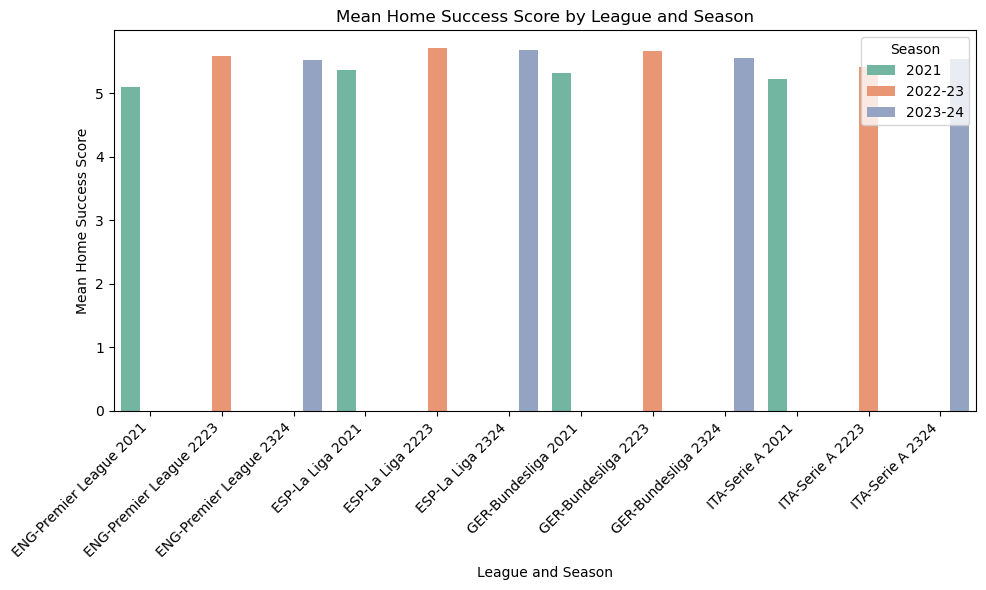

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating the data from the given statistics

data = {
    "League": [
        "ENG-Premier League 2021", "ENG-Premier League 2223", "ENG-Premier League 2324",
        "ESP-La Liga 2021", "ESP-La Liga 2223", "ESP-La Liga 2324",
        "GER-Bundesliga 2021", "GER-Bundesliga 2223", "GER-Bundesliga 2324",
        "ITA-Serie A 2021", "ITA-Serie A 2223", "ITA-Serie A 2324"
    ],
    "Mean": [
        5.099474, 5.593684, 5.521693,
        5.368865, 5.705805, 5.676984,
        5.320724, 5.664379, 5.560197,
        5.228267, 5.413684, 5.533687
    ],
    "Season": [
        "2021", "2022-23", "2023-24",
        "2021", "2022-23", "2023-24",
        "2021", "2022-23", "2023-24",
        "2021", "2022-23", "2023-24"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="League", y="Mean", data=df, hue="Season", palette="Set2")

# Customize plot
plt.title('Mean Home Success Score by League and Season')
plt.xlabel('League and Season')
plt.ylabel('Mean Home Success Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season')

# Show plot
plt.tight_layout()
plt.show()


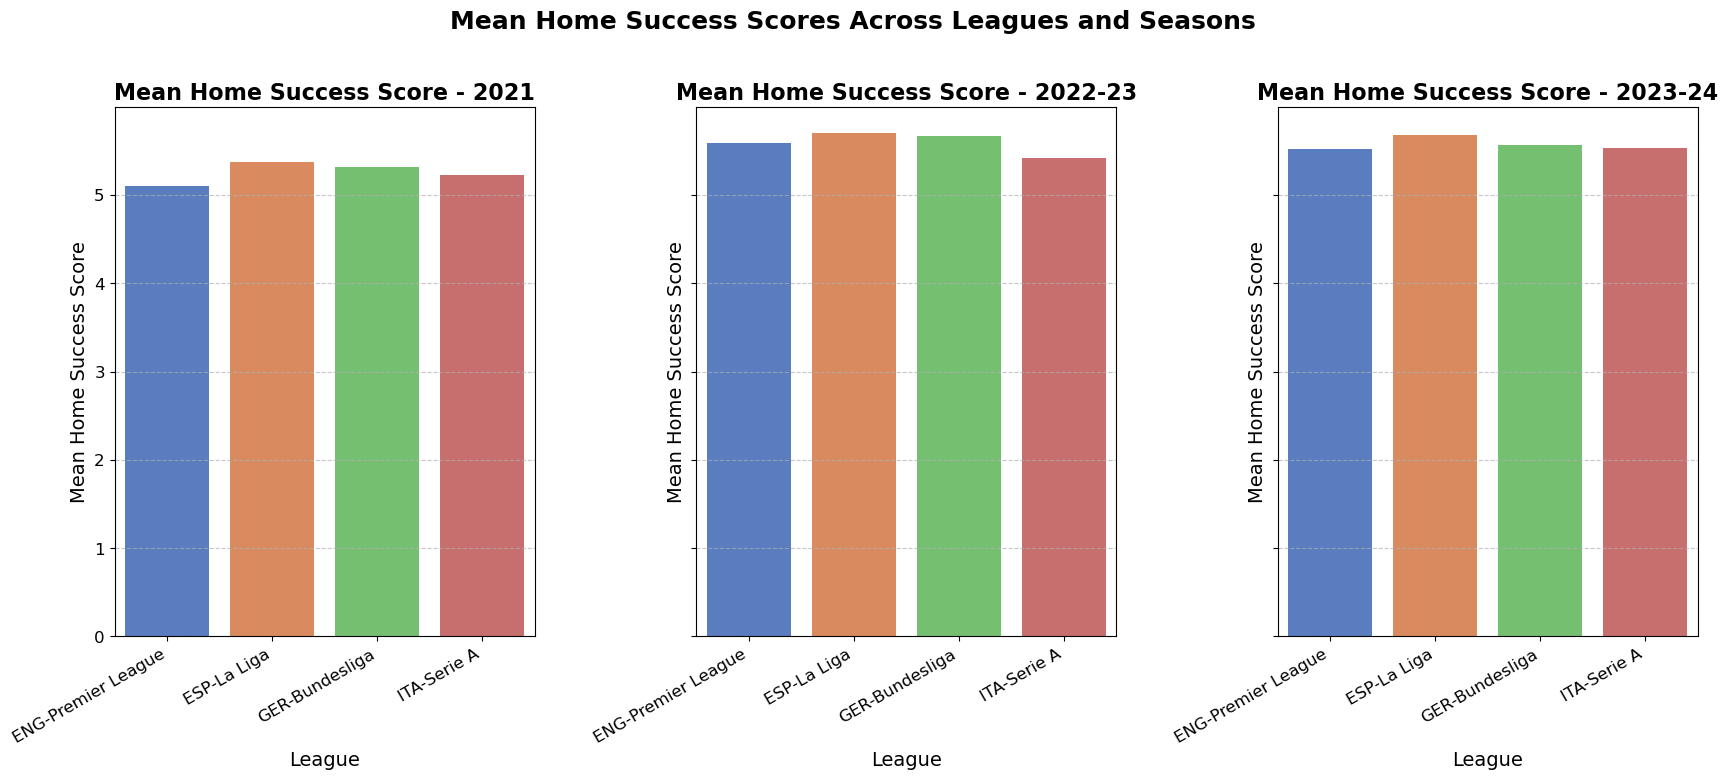

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating the data from the given statistics
data = {
    "League": [
        "ENG-Premier League", "ENG-Premier League", "ENG-Premier League",
        "ESP-La Liga", "ESP-La Liga", "ESP-La Liga",
        "GER-Bundesliga", "GER-Bundesliga", "GER-Bundesliga",
        "ITA-Serie A", "ITA-Serie A", "ITA-Serie A"
    ],
    "Mean": [
        5.099474, 5.593684, 5.521693,
        5.368865, 5.705805, 5.676984,
        5.320724, 5.664379, 5.560197,
        5.228267, 5.413684, 5.533687
    ],
    "Season": [
        "2021", "2022-23", "2023-24",
        "2021", "2022-23", "2023-24",
        "2021", "2022-23", "2023-24",
        "2021", "2022-23", "2023-24"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Unique seasons
seasons = df['Season'].unique()

# Create a figure with 3 subplots (one for each season), with more space between the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Loop through each season and create a plot
for i, season in enumerate(seasons):
    season_data = df[df['Season'] == season]
    sns.barplot(x="League", y="Mean", data=season_data, ax=axes[i], palette="muted")

    # Customize the plots
    axes[i].set_title(f'Mean Home Success Score - {season}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('League', fontsize=14)
    axes[i].set_ylabel('Mean Home Success Score', fontsize=14)
    axes[i].tick_params(axis='x', rotation=30, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    # Add a grid for better readability
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Improve spacing between bars and plot labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='right')

# Adjust layout for better spacing and visual appeal
plt.tight_layout(pad=4.0)  # Increase padding between subplots
plt.suptitle('Mean Home Success Scores Across Leagues and Seasons', fontsize=18, fontweight='bold', y=1.02)

# Show the plot
plt.show()


Failed to download logo for ENG-Premier League.
Failed to download logo for ESP-La Liga.
Failed to download logo for GER-Bundesliga.
Failed to download logo for ITA-Serie A.


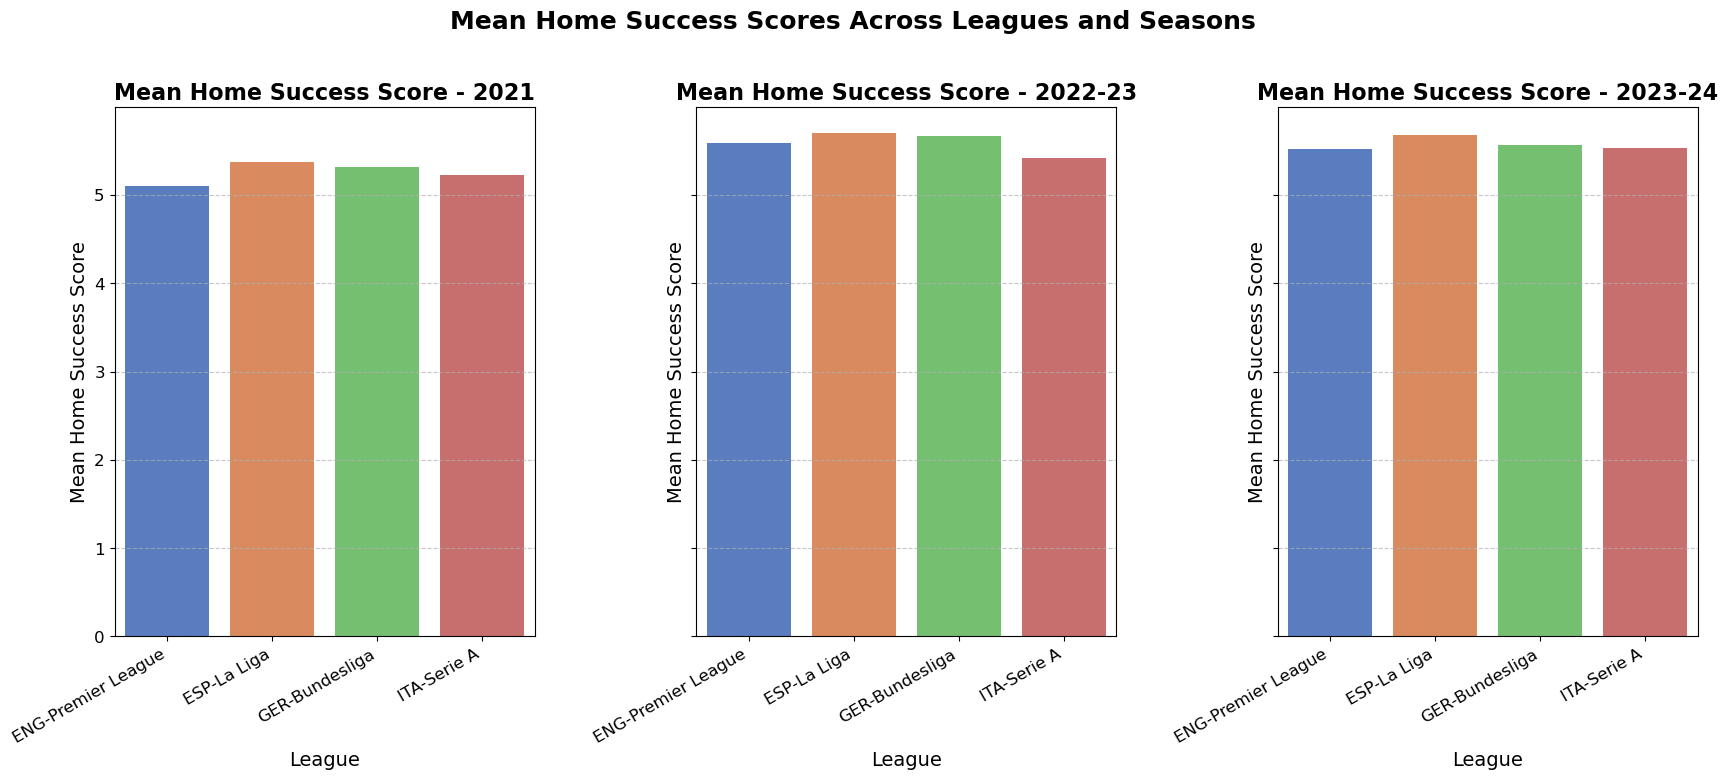

In [195]:
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.image as mpimg

# Define the URLs for the logos
logos_urls = {
    "ENG-Premier League": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Premier_League_Logo_2016.svg/1920px-Premier_League_Logo_2016.svg.png",
    "ESP-La Liga": "https://upload.wikimedia.org/wikipedia/commons/4/4f/La_Liga_logo.svg",
    "GER-Bundesliga": "https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Bundesliga_Logo_%28since_2010%29.svg/1024px-Bundesliga_Logo_%28since_2010%29.svg.png",
    "ITA-Serie A": "https://upload.wikimedia.org/wikipedia/commons/e/e0/Serie_A_Logo_%28since_2020%29.svg"
}

# Create a directory to store logos
logo_dir = 'logos'
if not os.path.exists(logo_dir):
    os.makedirs(logo_dir)

# Function to download logos and save them locally
def download_logos():
    for league, url in logos_urls.items():
        logo_path = os.path.join(logo_dir, f"{league.replace(' ', '_')}_logo.png")
        if not os.path.exists(logo_path):  # Check if logo is already downloaded
            print(f"Downloading logo for {league}...")
            response = requests.get(url)
            if response.status_code == 200:
                with open(logo_path, 'wb') as f:
                    f.write(response.content)
                print(f"Logo for {league} downloaded successfully.")
            else:
                print(f"Failed to download logo for {league}.")
        else:
            print(f"Logo for {league} already exists.")

# Download logos (if not already downloaded)
download_logos()

# Creating the data from the given statistics
data = {
    "League": [
        "ENG-Premier League", "ENG-Premier League", "ENG-Premier League",
        "ESP-La Liga", "ESP-La Liga", "ESP-La Liga",
        "GER-Bundesliga", "GER-Bundesliga", "GER-Bundesliga",
        "ITA-Serie A", "ITA-Serie A", "ITA-Serie A"
    ],
    "Mean": [
        5.099474, 5.593684, 5.521693,
        5.368865, 5.705805, 5.676984,
        5.320724, 5.664379, 5.560197,
        5.228267, 5.413684, 5.533687
    ],
    "Season": [
        "2021", "2022-23", "2023-24",
        "2021", "2022-23", "2023-24",
        "2021", "2022-23", "2023-24",
        "2021", "2022-23", "2023-24"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Unique seasons
seasons = df['Season'].unique()

# Create a figure with 3 subplots (one for each season), with more space between the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Loop through each season and create a plot
for i, season in enumerate(seasons):
    season_data = df[df['Season'] == season]
    sns.barplot(x="League", y="Mean", data=season_data, ax=axes[i], palette="muted")

    # Customize the plots
    axes[i].set_title(f'Mean Home Success Score - {season}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('League', fontsize=14)
    axes[i].set_ylabel('Mean Home Success Score', fontsize=14)
    axes[i].tick_params(axis='x', rotation=30, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    # Add a grid for better readability
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Add the logos to the top of each subplot
    for j, league in enumerate(season_data['League']):
        logo_path = os.path.join(logo_dir, f"{league.replace(' ', '_')}_logo.png")
        if os.path.exists(logo_path):
            img = mpimg.imread(logo_path)
            # Add the logo at a custom position above each bar
            axes[i].imshow(img, aspect='auto', extent=[j - 0.2, j + 0.2, axes[i].get_ylim()[1] + 0.2, axes[i].get_ylim()[1] + 0.7])

    # Improve spacing between bars and plot labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='right')

# Adjust layout for better spacing and visual appeal
plt.tight_layout(pad=4.0)  # Increase padding between subplots
plt.suptitle('Mean Home Success Scores Across Leagues and Seasons', fontsize=18, fontweight='bold', y=1.02)

# Show the plot
plt.show()


# Rolling averages

In [196]:
df = temp

In [197]:
df.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result,prediction,home_success_score - away_success_score
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win,True,5.858
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win,True,4.806
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,win,False,1.818
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,draw,False,-0.188
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,draw,False,-1.806


In [198]:
# Iterate over each row in df
for index, row in df.iterrows():
    if row['outcome'] == 'win':
        df.loc[index, 'home_points'] = 3
        df.loc[index, 'away_points'] = 0
    elif row['outcome'] == 'draw':
        df.loc[index, 'home_points'] = 1
        df.loc[index, 'away_points'] = 1
    else:
        df.loc[index, 'home_points'] = 0
        df.loc[index, 'away_points'] = 3
df.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,home_possession_play,home_counter_attack,home_high_press,home_direct_play,home_wing_play,home_set_piece_focus,home_creative_playmaking,home_playing_out_back,home_low_block,home_high_defensive_line,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,away_possession_play,away_counter_attack,away_high_press,away_direct_play,away_wing_play,away_set_piece_focus,away_creative_playmaking,away_playing_out_back,away_low_block,away_high_defensive_line,home_success_score,away_success_score,outcome,predicted_result,prediction,home_success_score - away_success_score,home_points,away_points
0,GER-Bundesliga,2021,1,FC Bayern München,Schalke 04,8,0,84,91,84,82,10,10.0,298,69,65,17,12,3,60,286,117,81,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,7.929,2.071,win,win,True,5.858,3.0,0.0
1,GER-Bundesliga,2021,1,Borussia Dortmund,Borussia Mönchengladbach,3,0,82,85,81,81,8,9.0,269,49,42,11,8,1,37,269,126,51,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,7.403,2.597,win,win,True,4.806,3.0,0.0
2,GER-Bundesliga,2021,1,Eintracht Frankfurt,DSC Arminia Bielefeld,1,1,77,78,76,76,5,6.0,250,57,55,15,14,6,47,229,97,64,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,5.909,4.091,draw,win,False,1.818,1.0,1.0
3,GER-Bundesliga,2021,1,FC Köln,TSG Hoffenheim,2,3,74,75,73,72,3,4.0,214,46,40,13,9,1,35,203,90,47,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,4.906,5.094,lose,draw,False,-0.188,0.0,3.0
4,GER-Bundesliga,2021,1,FC Union Berlin,FC Augsburg,1,3,72,73,72,73,1,2.0,260,51,46,17,11,4,41,253,114,51,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,4.097,5.903,lose,draw,False,-1.806,0.0,3.0


In [199]:
import pandas as pd

# Assuming you already have the dataset loaded in a DataFrame called 'df'

# Create home dataset with only columns relevant to the home team
home_columns = ['league', 'season', 'week', 'home_team', 'home_score', 'away_score', 'home_overall', 'home_attack', 
                'home_midfield', 'home_defence', 'home_international_prestige', 'home_domestic_prestige', 
                'home_possession_play', 'home_counter_attack', 'home_high_press', 'home_direct_play', 
                'home_wing_play', 'home_set_piece_focus', 'home_creative_playmaking', 'home_playing_out_back', 
                'home_low_block', 'home_high_defensive_line', 'home_success_score', 'outcome', "home_points"]

home_dataset = df[home_columns].copy()

# Rename the columns in home dataset by removing 'home_' prefix
home_dataset.columns = [col.replace('home_', '') if 'home_' in col else col for col in home_dataset.columns]
# Rename 'away_score' to 'conceded_goals' for the home dataset
home_dataset = home_dataset.rename(columns={'away_score': 'conceded_goals'})

# Create away dataset with only columns relevant to the away team
away_columns = ['league', 'season', 'week', 'away_team', 'away_score', 'home_score', 'away_overall', 'away_attack', 
                'away_midfield', 'away_defence', 'away_international_prestige', 'away_domestic_prestige', 
                'away_possession_play', 'away_counter_attack', 'away_high_press', 'away_direct_play', 
                'away_wing_play', 'away_set_piece_focus', 'away_creative_playmaking', 'away_playing_out_back', 
                'away_low_block', 'away_high_defensive_line', 'away_success_score', 'outcome', "away_points"]

away_dataset = df[away_columns].copy()

# Rename the columns in away dataset by removing 'away_' prefix
away_dataset.columns = [col.replace('away_', '') if 'away_' in col else col for col in away_dataset.columns]
# Rename 'home_score' to 'conceded_goals' for the away dataset
away_dataset = away_dataset.rename(columns={'home_score': 'conceded_goals'})


In [200]:
away_dataset.head()

,league,season,week,team,score,conceded_goals,overall,attack,midfield,defence,international_prestige,domestic_prestige,possession_play,counter_attack,high_press,direct_play,wing_play,set_piece_focus,creative_playmaking,playing_out_back,low_block,high_defensive_line,success_score,outcome,points
0,GER-Bundesliga,2021,1,Schalke 04,0,8,76,75,75,77,5,6.0,168,35,29,6,5,0,22,156,74,32,2.071,win,0.0
1,GER-Bundesliga,2021,1,Borussia Mönchengladbach,0,3,79,80,79,78,5,7.0,283,66,60,9,6,1,55,269,110,79,2.597,win,0.0
2,GER-Bundesliga,2021,1,DSC Arminia Bielefeld,1,1,71,72,71,70,1,1.0,148,38,30,11,7,1,25,135,60,33,4.091,draw,1.0
3,GER-Bundesliga,2021,1,TSG Hoffenheim,3,2,76,77,75,76,5,6.0,217,45,40,12,8,2,35,205,92,46,5.094,lose,3.0
4,GER-Bundesliga,2021,1,FC Augsburg,3,1,74,77,74,73,3,4.0,182,37,30,11,8,0,24,174,84,31,5.903,lose,3.0


In [201]:
import pandas as pd

# Assuming df, home_dataset, and away_dataset are already loaded

# List of features to calculate rolling averages for
rolling_features = ['possession_play', 'counter_attack', 
                    'high_press', 'direct_play', 'wing_play', 'set_piece_focus', 
                    'creative_playmaking', 'playing_out_back', 'low_block', 'high_defensive_line', 'success_score', 'conceded_goals','score','points']
                    
# Initialize empty lists to store rolling average columns
for feature in rolling_features:
    df[f'home_{feature}_rolling_avg'] = None
    df[f'away_{feature}_rolling_avg'] = None

# Function to calculate rolling averages for a given team in a dataset
def calculate_rolling_average(team, week, league, season, home_dataset, away_dataset):
    # Filter the dataset for the same team, league, and season
    team_data1 = home_dataset[(home_dataset['team'] == team) & (home_dataset['league'] == league) & (home_dataset['season'] == season)]
    team_data2 = away_dataset[(away_dataset['team'] == team) & (away_dataset['league'] == league) & (away_dataset['season'] == season)]

    # Concatenate the two datasets
    team_data = pd.concat([team_data1, team_data2])

# Convert the 'week' column to numeric (forcing errors to NaN, if any)
    team_data['week'] = pd.to_numeric(team_data['week'], errors='coerce')
    previous_weeks = team_data[team_data['week'] < int(week)].sort_values(by='week', ascending=False).head(i)
    
    # Calculate the mean for the rolling features
    rolling_avg = {}
    for feature in rolling_features:
        if not previous_weeks.empty:
            rolling_avg[feature] = np.round(previous_weeks[feature].mean(), 2)

        else:
            rolling_avg[feature] = None  # No previous data available
            
    return rolling_avg

# Iterate over each row in df
for index, row in df.iterrows():
    league = row['league']
    season = row['season']
    week = row['week']
    home_team = row['home_team']
    away_team = row['away_team']
    
    # Calculate rolling averages for the home team
    home_rolling_avg = calculate_rolling_average(home_team, week, league, season, home_dataset, away_dataset)
    
    # Calculate rolling averages for the away team
    away_rolling_avg = calculate_rolling_average(away_team, week, league, season, home_dataset, away_dataset)
    
    # Update the original dataframe with the calculated rolling averages
    for feature in rolling_features:
        df.at[index, f'home_{feature}_rolling_avg'] = home_rolling_avg[feature]
        df.at[index, f'away_{feature}_rolling_avg'] = away_rolling_avg[feature]

# # Check the updated dataframe
# print(df.head())


In [202]:
import numpy as np

# Initialize columns for rolling_avg2
for feature in rolling_features:
    df[f'home_{feature}_rolling_avg2'] = None
    df[f'away_{feature}_rolling_avg2'] = None

# Function to calculate rolling averages for 10,000 previous rows for a given team in a dataset
def calculate_rolling_average_10000(team, week, league, season, home_dataset, away_dataset):
    # Filter the dataset for the same team, league, and season
    team_data1 = home_dataset[(home_dataset['team'] == team) & (home_dataset['league'] == league) & (home_dataset['season'] == season)]
    team_data2 = away_dataset[(away_dataset['team'] == team) & (away_dataset['league'] == league) & (away_dataset['season'] == season)]

    # Concatenate the two datasets
    team_data = pd.concat([team_data1, team_data2])

    # Convert the 'week' column to numeric (forcing errors to NaN, if any)
    team_data['week'] = pd.to_numeric(team_data['week'], errors='coerce')

    previous_weeks = team_data[team_data['week'] < int(week)].sort_values(by='week', ascending=False).head(10)
    
    # Calculate the mean for the rolling features
    rolling_avg2 = {}
    for feature in rolling_features:
        if not previous_weeks.empty:
            rolling_avg2[feature] = np.round(previous_weeks[feature].mean(), 2)
        else:
            rolling_avg2[feature] = None  # No previous data available
            
    return rolling_avg2

# Iterate over each row in df for rolling_avg2 calculation
for index, row in df.iterrows():
    league = row['league']
    season = row['season']
    week = row['week']
    home_team = row['home_team']
    away_team = row['away_team']
    
    # Calculate rolling_avg2 for the home team
    home_rolling_avg2 = calculate_rolling_average_10000(home_team, week, league, season, home_dataset, away_dataset)
    
    # Calculate rolling_avg2 for the away team
    away_rolling_avg2 = calculate_rolling_average_10000(away_team, week, league, season, home_dataset, away_dataset)
    
    # Update the original dataframe with the calculated rolling_avg2
    for feature in rolling_features:
        df.at[index, f'home_{feature}_rolling_avg2'] = home_rolling_avg2[feature]
        df.at[index, f'away_{feature}_rolling_avg2'] = away_rolling_avg2[feature]

# # Check the updated dataframe
# print(df.head())


In [203]:
columns_to_drop = ['home_possession_play', 'home_counter_attack', 'home_high_press','home_direct_play', 'home_wing_play', 'home_set_piece_focus', 'home_creative_playmaking', 'home_playing_out_back', 'home_low_block', 'home_high_defensive_line', 'away_possession_play', 'away_counter_attack', 'away_high_press', 'away_direct_play', 'away_wing_play', 'away_set_piece_focus', 'away_creative_playmaking', 'away_playing_out_back', 'away_low_block', 'away_high_defensive_line', "home_success_score - away_success_score"]
df.drop(columns=columns_to_drop, inplace=True)

In [204]:
df.dropna(inplace=True)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 9 to 4334
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   league                                 4213 non-null   object 
 1   season                                 4213 non-null   int64  
 2   week                                   4213 non-null   object 
 3   home_team                              4213 non-null   object 
 4   away_team                              4213 non-null   object 
 5   home_score                             4213 non-null   int64  
 6   away_score                             4213 non-null   int64  
 7   home_overall                           4213 non-null   int64  
 8   home_attack                            4213 non-null   int64  
 9   home_midfield                          4213 non-null   int64  
 10  home_defence                           4213 non-null   int64  
 11  home_inte

In [206]:
df.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,home_success_score,away_success_score,outcome,predicted_result,prediction,home_points,away_points,home_possession_play_rolling_avg,away_possession_play_rolling_avg,home_counter_attack_rolling_avg,away_counter_attack_rolling_avg,home_high_press_rolling_avg,away_high_press_rolling_avg,home_direct_play_rolling_avg,away_direct_play_rolling_avg,home_wing_play_rolling_avg,away_wing_play_rolling_avg,home_set_piece_focus_rolling_avg,away_set_piece_focus_rolling_avg,home_creative_playmaking_rolling_avg,away_creative_playmaking_rolling_avg,home_playing_out_back_rolling_avg,away_playing_out_back_rolling_avg,home_low_block_rolling_avg,away_low_block_rolling_avg,home_high_defensive_line_rolling_avg,away_high_defensive_line_rolling_avg,home_success_score_rolling_avg,away_success_score_rolling_avg,home_conceded_goals_rolling_avg,away_conceded_goals_rolling_avg,home_score_rolling_avg,away_score_rolling_avg,home_points_rolling_avg,away_points_rolling_avg,home_possession_play_rolling_avg2,away_possession_play_rolling_avg2,home_counter_attack_rolling_avg2,away_counter_attack_rolling_avg2,home_high_press_rolling_avg2,away_high_press_rolling_avg2,home_direct_play_rolling_avg2,away_direct_play_rolling_avg2,home_wing_play_rolling_avg2,away_wing_play_rolling_avg2,home_set_piece_focus_rolling_avg2,away_set_piece_focus_rolling_avg2,home_creative_playmaking_rolling_avg2,away_creative_playmaking_rolling_avg2,home_playing_out_back_rolling_avg2,away_playing_out_back_rolling_avg2,home_low_block_rolling_avg2,away_low_block_rolling_avg2,home_high_defensive_line_rolling_avg2,away_high_defensive_line_rolling_avg2,home_success_score_rolling_avg2,away_success_score_rolling_avg2,home_conceded_goals_rolling_avg2,away_conceded_goals_rolling_avg2,home_score_rolling_avg2,away_score_rolling_avg2,home_points_rolling_avg2,away_points_rolling_avg2
9,GER-Bundesliga,2021,2,Hertha BSC,Eintracht Frankfurt,1,3,76,77,76,75,4,6.0,77,78,76,76,5,6.0,4.097,5.903,lose,draw,False,0.0,3.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0
10,GER-Bundesliga,2021,2,DSC Arminia Bielefeld,FC Köln,1,0,71,72,71,70,1,1.0,74,75,73,72,3,4.0,4.784,5.216,win,draw,False,3.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0
11,GER-Bundesliga,2021,2,FC Augsburg,Borussia Dortmund,2,0,74,77,74,73,3,4.0,82,85,81,81,8,9.0,5.871,4.129,win,win,True,3.0,0.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0
12,GER-Bundesliga,2021,2,Bayer 04 Leverkusen,RB Leipzig,1,1,79,77,80,79,6,7.0,80,77,80,80,7,8.0,5.000,5.000,draw,draw,True,1.0,1.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0
13,GER-Bundesliga,2021,2,Borussia Mönchengladbach,FC Union Berlin,1,1,79,80,79,78,5,7.0,72,73,72,73,1,2.0,5.690,4.310,draw,win,False,1.0,1.0,283.0,260.0,66.0,51.0,60.0,46.0,9.0,17.0,6.0,11.0,1.0,4.0,55.0,41.0,269.0,253.0,110.0,114.0,79.0,51.0,2.6,4.1,3.0,3.0,0.0,1.0,0.0,0.0,283.0,260.0,66.0,51.0,60.

In [207]:
data = df

In [208]:
data.tail()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,home_success_score,away_success_score,outcome,predicted_result,prediction,home_points,away_points,home_possession_play_rolling_avg,away_possession_play_rolling_avg,home_counter_attack_rolling_avg,away_counter_attack_rolling_avg,home_high_press_rolling_avg,away_high_press_rolling_avg,home_direct_play_rolling_avg,away_direct_play_rolling_avg,home_wing_play_rolling_avg,away_wing_play_rolling_avg,home_set_piece_focus_rolling_avg,away_set_piece_focus_rolling_avg,home_creative_playmaking_rolling_avg,away_creative_playmaking_rolling_avg,home_playing_out_back_rolling_avg,away_playing_out_back_rolling_avg,home_low_block_rolling_avg,away_low_block_rolling_avg,home_high_defensive_line_rolling_avg,away_high_defensive_line_rolling_avg,home_success_score_rolling_avg,away_success_score_rolling_avg,home_conceded_goals_rolling_avg,away_conceded_goals_rolling_avg,home_score_rolling_avg,away_score_rolling_avg,home_points_rolling_avg,away_points_rolling_avg,home_possession_play_rolling_avg2,away_possession_play_rolling_avg2,home_counter_attack_rolling_avg2,away_counter_attack_rolling_avg2,home_high_press_rolling_avg2,away_high_press_rolling_avg2,home_direct_play_rolling_avg2,away_direct_play_rolling_avg2,home_wing_play_rolling_avg2,away_wing_play_rolling_avg2,home_set_piece_focus_rolling_avg2,away_set_piece_focus_rolling_avg2,home_creative_playmaking_rolling_avg2,away_creative_playmaking_rolling_avg2,home_playing_out_back_rolling_avg2,away_playing_out_back_rolling_avg2,home_low_block_rolling_avg2,away_low_block_rolling_avg2,home_high_defensive_line_rolling_avg2,away_high_defensive_line_rolling_avg2,home_success_score_rolling_avg2,away_success_score_rolling_avg2,home_conceded_goals_rolling_avg2,away_conceded_goals_rolling_avg2,home_score_rolling_avg2,away_score_rolling_avg2,home_points_rolling_avg2,away_points_rolling_avg2
4330,ENG-Premier League,2324,38,Crystal Palace,Aston Villa,5,0,76,75,76,76,2,4.0,80,82,79,79,5,6.0,7.119,2.881,win,win,True,3.0,0.0,178.5,212.5,49.0,39.5,43.5,35.0,9.5,6.0,10.0,7.0,2.0,1.0,34.5,27.0,158.5,207.5,65.5,99.5,51.0,41.5,6.73,3.65,0.5,2.0,3.5,1.5,3.0,0.5,193.0,209.4,48.9,46.2,44.8,40.3,9.1,8.0,8.7,6.9,1.7,2.0,36.3,34.4,173.5,198.2,72.7,88.4,52.9,51.1,5.49,4.52,1.1,1.9,2.0,1.7,1.8,1.3
4331,ENG-Premier League,2324,38,Liverpool,Wolverhampton Wanderers,2,0,83,84,82,84,9,9.0,76,75,77,76,3,4.0,7.605,2.395,win,win,True,3.0,0.0,245.0,244.0,58.5,48.5,53.5,44.5,12.5,8.0,11.5,7.5,3.0,2.0,45.5,37.5,231.5,231.5,98.5,104.5,66.5,56.5,5.22,3.74,2.5,4.0,3.5,1.0,2.0,0.0,299.1,252.3,74.9,47.6,72.2,44.0,13.0,8.3,12.3,7.0,3.8,1.5,64.8,37.1,273.3,243.0,106.2,111.8,94.1,54.8,5.54,4.16,1.6,2.0,2.0,1.0,1.6,0.8
4332,ENG-Premier League,2324,38,Luton Town,Fulham,2,4,72,72,72,72,1,1.0,77,76,77,76,2,5.0,4.842,5.158,lose,draw,False,0.0,3.0,172.5,203.5,43.5,40.0,40.0,32.5,9.0,7.5,10.0,6.5,3.0,1.0,31.5,27.0,158.0,194.0,69.0,90.5,45.0,39.0,3.87,3.92,2.0,2.0,1.0,0.0,0.5,0.5,176.4,235.7,44.3,50.4,39.8,45.7,8.7,9.9,8.5,9.8,2.1,2.6,32.4,39.2,160.3,220.1,68.2,96.4,45.8,57.0,3.9,4.87,2.3,1.7,1.0,1.2,0.6,0.9
4333,ENG-Premier League,2324,38,Manchester City,West Ham United,3,1,85,87,86,83,10,10.0,78,78,79,78,6,6.0,6.626,3.374,win,win,True,3.0,0.0,335.0,185.0,83.5,46.5,78.0,40.0,12.0,11.0,10.0,9.0,3.0,2.0,74.5,34.0,312.5,173.5,118.0,75.0,105.5,46.0,7.38,4.78,0.5,3.0,4.5,1.5,3.0,1.5,333.6,174.3,85.6,47.1,81.2,40.7,10.9,10.3,8.5,9.1,2.1,2.0,76.8,33.7,306.0,158.9,113.0,66.2,110.7,47.4,6.26,4.84,0.6,2.4,3.1,1.6,2.6,1.0
4334,ENG-Premier League,2324,38,Sheffield United,Tottenham Hotspur,0,3,73,72,74,72,1,1.0,81,81,80,79,7,7.0,2.911,7.089,lose,lose,True,0.0,3.0,203.0,265.5,48.5,65.0,45.0,63.0,8.0,8.0,8.5,9.5,1.5,2.5,36.5,55.5,183.0,240.5,79.0,95.0,53.0,83.5,3.77,5.39,2.0,2.5,0.5,2.0,0.0,1.5,148.3,291.0,42.

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 9 to 4334
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   league                                 4213 non-null   object 
 1   season                                 4213 non-null   int64  
 2   week                                   4213 non-null   object 
 3   home_team                              4213 non-null   object 
 4   away_team                              4213 non-null   object 
 5   home_score                             4213 non-null   int64  
 6   away_score                             4213 non-null   int64  
 7   home_overall                           4213 non-null   int64  
 8   home_attack                            4213 non-null   int64  
 9   home_midfield                          4213 non-null   int64  
 10  home_defence                           4213 non-null   int64  
 11  home_inte

In [210]:
data["week"].unique()


array(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38'], dtype=object)

In [211]:
# import pandas as pd
# data['week'] = pd.to_numeric(data['week'], errors='coerce')
# data = data[data['week'] > 5]

In [212]:
data.head(50)

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,home_success_score,away_success_score,outcome,predicted_result,prediction,home_points,away_points,home_possession_play_rolling_avg,away_possession_play_rolling_avg,home_counter_attack_rolling_avg,away_counter_attack_rolling_avg,home_high_press_rolling_avg,away_high_press_rolling_avg,home_direct_play_rolling_avg,away_direct_play_rolling_avg,home_wing_play_rolling_avg,away_wing_play_rolling_avg,home_set_piece_focus_rolling_avg,away_set_piece_focus_rolling_avg,home_creative_playmaking_rolling_avg,away_creative_playmaking_rolling_avg,home_playing_out_back_rolling_avg,away_playing_out_back_rolling_avg,home_low_block_rolling_avg,away_low_block_rolling_avg,home_high_defensive_line_rolling_avg,away_high_defensive_line_rolling_avg,home_success_score_rolling_avg,away_success_score_rolling_avg,home_conceded_goals_rolling_avg,away_conceded_goals_rolling_avg,home_score_rolling_avg,away_score_rolling_avg,home_points_rolling_avg,away_points_rolling_avg,home_possession_play_rolling_avg2,away_possession_play_rolling_avg2,home_counter_attack_rolling_avg2,away_counter_attack_rolling_avg2,home_high_press_rolling_avg2,away_high_press_rolling_avg2,home_direct_play_rolling_avg2,away_direct_play_rolling_avg2,home_wing_play_rolling_avg2,away_wing_play_rolling_avg2,home_set_piece_focus_rolling_avg2,away_set_piece_focus_rolling_avg2,home_creative_playmaking_rolling_avg2,away_creative_playmaking_rolling_avg2,home_playing_out_back_rolling_avg2,away_playing_out_back_rolling_avg2,home_low_block_rolling_avg2,away_low_block_rolling_avg2,home_high_defensive_line_rolling_avg2,away_high_defensive_line_rolling_avg2,home_success_score_rolling_avg2,away_success_score_rolling_avg2,home_conceded_goals_rolling_avg2,away_conceded_goals_rolling_avg2,home_score_rolling_avg2,away_score_rolling_avg2,home_points_rolling_avg2,away_points_rolling_avg2
9,GER-Bundesliga,2021,2,Hertha BSC,Eintracht Frankfurt,1,3,76,77,76,75,4,6.0,77,78,76,76,5,6.0,4.097,5.903,lose,draw,False,0.0,3.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0
10,GER-Bundesliga,2021,2,DSC Arminia Bielefeld,FC Köln,1,0,71,72,71,70,1,1.0,74,75,73,72,3,4.0,4.784,5.216,win,draw,False,3.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0
11,GER-Bundesliga,2021,2,FC Augsburg,Borussia Dortmund,2,0,74,77,74,73,3,4.0,82,85,81,81,8,9.0,5.871,4.129,win,win,True,3.0,0.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0
12,GER-Bundesliga,2021,2,Bayer 04 Leverkusen,RB Leipzig,1,1,79,77,80,79,6,7.0,80,77,80,80,7,8.0,5.000,5.000,draw,draw,True,1.0,1.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0
13,GER-Bundesliga,2021,2,Borussia Mönchengladbach,FC Union Berlin,1,1,79,80,79,78,5,7.0,72,73,72,73,1,2.0,5.690,4.310,draw,win,False,1.0,1.0,283.0,260.0,66.0,51.0,60.0,46.0,9.0,17.0,6.0,11.0,1.0,4.0,55.0,41.0,269.0,253.0,110.0,114.0,79.0,51.0,2.6,4.1,3.0,3.0,0.0,1.0,0.0,0.0,283.0,260.0,66.0,51.0,60.

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 9 to 4334
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   league                                 4213 non-null   object 
 1   season                                 4213 non-null   int64  
 2   week                                   4213 non-null   object 
 3   home_team                              4213 non-null   object 
 4   away_team                              4213 non-null   object 
 5   home_score                             4213 non-null   int64  
 6   away_score                             4213 non-null   int64  
 7   home_overall                           4213 non-null   int64  
 8   home_attack                            4213 non-null   int64  
 9   home_midfield                          4213 non-null   int64  
 10  home_defence                           4213 non-null   int64  
 11  home_inte

In [214]:
# # # Assuming 'data' is a DataFrame that contains all the feature columns
# features = [
#     'home_overall', 'home_attack', 'home_midfield', 'home_defence', 'home_international_prestige',
#     'home_domestic_prestige', 'home_possession_play_rolling_avg', 'home_counter_attack_rolling_avg',
#     'home_high_press_rolling_avg', 'home_direct_play_rolling_avg', 'home_wing_play_rolling_avg',
#     'home_set_piece_focus_rolling_avg', 'home_creative_playmaking_rolling_avg', 'home_playing_out_back_rolling_avg',
#     'home_low_block_rolling_avg', 'home_high_defensive_line_rolling_avg', 'home_success_score_rolling_avg',
#     'home_conceded_goals_rolling_avg', 'home_score_rolling_avg', 'home_points_rolling_avg',

#     'away_overall', 'away_attack', 'away_midfield', 'away_defence', 'away_international_prestige',
#     'away_domestic_prestige', 'away_possession_play_rolling_avg', 'away_counter_attack_rolling_avg',
#     'away_high_press_rolling_avg', 'away_direct_play_rolling_avg', 'away_wing_play_rolling_avg',
#     'away_set_piece_focus_rolling_avg', 'away_creative_playmaking_rolling_avg', 'away_playing_out_back_rolling_avg',
#     'away_low_block_rolling_avg', 'away_high_defensive_line_rolling_avg', 'away_success_score_rolling_avg',
#     'away_conceded_goals_rolling_avg', 'away_score_rolling_avg', 'away_points_rolling_avg'
# ]

In [215]:
data.tail()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,home_success_score,away_success_score,outcome,predicted_result,prediction,home_points,away_points,home_possession_play_rolling_avg,away_possession_play_rolling_avg,home_counter_attack_rolling_avg,away_counter_attack_rolling_avg,home_high_press_rolling_avg,away_high_press_rolling_avg,home_direct_play_rolling_avg,away_direct_play_rolling_avg,home_wing_play_rolling_avg,away_wing_play_rolling_avg,home_set_piece_focus_rolling_avg,away_set_piece_focus_rolling_avg,home_creative_playmaking_rolling_avg,away_creative_playmaking_rolling_avg,home_playing_out_back_rolling_avg,away_playing_out_back_rolling_avg,home_low_block_rolling_avg,away_low_block_rolling_avg,home_high_defensive_line_rolling_avg,away_high_defensive_line_rolling_avg,home_success_score_rolling_avg,away_success_score_rolling_avg,home_conceded_goals_rolling_avg,away_conceded_goals_rolling_avg,home_score_rolling_avg,away_score_rolling_avg,home_points_rolling_avg,away_points_rolling_avg,home_possession_play_rolling_avg2,away_possession_play_rolling_avg2,home_counter_attack_rolling_avg2,away_counter_attack_rolling_avg2,home_high_press_rolling_avg2,away_high_press_rolling_avg2,home_direct_play_rolling_avg2,away_direct_play_rolling_avg2,home_wing_play_rolling_avg2,away_wing_play_rolling_avg2,home_set_piece_focus_rolling_avg2,away_set_piece_focus_rolling_avg2,home_creative_playmaking_rolling_avg2,away_creative_playmaking_rolling_avg2,home_playing_out_back_rolling_avg2,away_playing_out_back_rolling_avg2,home_low_block_rolling_avg2,away_low_block_rolling_avg2,home_high_defensive_line_rolling_avg2,away_high_defensive_line_rolling_avg2,home_success_score_rolling_avg2,away_success_score_rolling_avg2,home_conceded_goals_rolling_avg2,away_conceded_goals_rolling_avg2,home_score_rolling_avg2,away_score_rolling_avg2,home_points_rolling_avg2,away_points_rolling_avg2
4330,ENG-Premier League,2324,38,Crystal Palace,Aston Villa,5,0,76,75,76,76,2,4.0,80,82,79,79,5,6.0,7.119,2.881,win,win,True,3.0,0.0,178.5,212.5,49.0,39.5,43.5,35.0,9.5,6.0,10.0,7.0,2.0,1.0,34.5,27.0,158.5,207.5,65.5,99.5,51.0,41.5,6.73,3.65,0.5,2.0,3.5,1.5,3.0,0.5,193.0,209.4,48.9,46.2,44.8,40.3,9.1,8.0,8.7,6.9,1.7,2.0,36.3,34.4,173.5,198.2,72.7,88.4,52.9,51.1,5.49,4.52,1.1,1.9,2.0,1.7,1.8,1.3
4331,ENG-Premier League,2324,38,Liverpool,Wolverhampton Wanderers,2,0,83,84,82,84,9,9.0,76,75,77,76,3,4.0,7.605,2.395,win,win,True,3.0,0.0,245.0,244.0,58.5,48.5,53.5,44.5,12.5,8.0,11.5,7.5,3.0,2.0,45.5,37.5,231.5,231.5,98.5,104.5,66.5,56.5,5.22,3.74,2.5,4.0,3.5,1.0,2.0,0.0,299.1,252.3,74.9,47.6,72.2,44.0,13.0,8.3,12.3,7.0,3.8,1.5,64.8,37.1,273.3,243.0,106.2,111.8,94.1,54.8,5.54,4.16,1.6,2.0,2.0,1.0,1.6,0.8
4332,ENG-Premier League,2324,38,Luton Town,Fulham,2,4,72,72,72,72,1,1.0,77,76,77,76,2,5.0,4.842,5.158,lose,draw,False,0.0,3.0,172.5,203.5,43.5,40.0,40.0,32.5,9.0,7.5,10.0,6.5,3.0,1.0,31.5,27.0,158.0,194.0,69.0,90.5,45.0,39.0,3.87,3.92,2.0,2.0,1.0,0.0,0.5,0.5,176.4,235.7,44.3,50.4,39.8,45.7,8.7,9.9,8.5,9.8,2.1,2.6,32.4,39.2,160.3,220.1,68.2,96.4,45.8,57.0,3.9,4.87,2.3,1.7,1.0,1.2,0.6,0.9
4333,ENG-Premier League,2324,38,Manchester City,West Ham United,3,1,85,87,86,83,10,10.0,78,78,79,78,6,6.0,6.626,3.374,win,win,True,3.0,0.0,335.0,185.0,83.5,46.5,78.0,40.0,12.0,11.0,10.0,9.0,3.0,2.0,74.5,34.0,312.5,173.5,118.0,75.0,105.5,46.0,7.38,4.78,0.5,3.0,4.5,1.5,3.0,1.5,333.6,174.3,85.6,47.1,81.2,40.7,10.9,10.3,8.5,9.1,2.1,2.0,76.8,33.7,306.0,158.9,113.0,66.2,110.7,47.4,6.26,4.84,0.6,2.4,3.1,1.6,2.6,1.0
4334,ENG-Premier League,2324,38,Sheffield United,Tottenham Hotspur,0,3,73,72,74,72,1,1.0,81,81,80,79,7,7.0,2.911,7.089,lose,lose,True,0.0,3.0,203.0,265.5,48.5,65.0,45.0,63.0,8.0,8.0,8.5,9.5,1.5,2.5,36.5,55.5,183.0,240.5,79.0,95.0,53.0,83.5,3.77,5.39,2.0,2.5,0.5,2.0,0.0,1.5,148.3,291.0,42.

In [216]:
# import pandas as pd

# # Drop weeks 1 to 4
# data['week'] = pd.to_numeric(data['week'], errors='coerce')
# data = data[data['week'] > 3]

In [217]:
data.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,home_success_score,away_success_score,outcome,predicted_result,prediction,home_points,away_points,home_possession_play_rolling_avg,away_possession_play_rolling_avg,home_counter_attack_rolling_avg,away_counter_attack_rolling_avg,home_high_press_rolling_avg,away_high_press_rolling_avg,home_direct_play_rolling_avg,away_direct_play_rolling_avg,home_wing_play_rolling_avg,away_wing_play_rolling_avg,home_set_piece_focus_rolling_avg,away_set_piece_focus_rolling_avg,home_creative_playmaking_rolling_avg,away_creative_playmaking_rolling_avg,home_playing_out_back_rolling_avg,away_playing_out_back_rolling_avg,home_low_block_rolling_avg,away_low_block_rolling_avg,home_high_defensive_line_rolling_avg,away_high_defensive_line_rolling_avg,home_success_score_rolling_avg,away_success_score_rolling_avg,home_conceded_goals_rolling_avg,away_conceded_goals_rolling_avg,home_score_rolling_avg,away_score_rolling_avg,home_points_rolling_avg,away_points_rolling_avg,home_possession_play_rolling_avg2,away_possession_play_rolling_avg2,home_counter_attack_rolling_avg2,away_counter_attack_rolling_avg2,home_high_press_rolling_avg2,away_high_press_rolling_avg2,home_direct_play_rolling_avg2,away_direct_play_rolling_avg2,home_wing_play_rolling_avg2,away_wing_play_rolling_avg2,home_set_piece_focus_rolling_avg2,away_set_piece_focus_rolling_avg2,home_creative_playmaking_rolling_avg2,away_creative_playmaking_rolling_avg2,home_playing_out_back_rolling_avg2,away_playing_out_back_rolling_avg2,home_low_block_rolling_avg2,away_low_block_rolling_avg2,home_high_defensive_line_rolling_avg2,away_high_defensive_line_rolling_avg2,home_success_score_rolling_avg2,away_success_score_rolling_avg2,home_conceded_goals_rolling_avg2,away_conceded_goals_rolling_avg2,home_score_rolling_avg2,away_score_rolling_avg2,home_points_rolling_avg2,away_points_rolling_avg2
9,GER-Bundesliga,2021,2,Hertha BSC,Eintracht Frankfurt,1,3,76,77,76,75,4,6.0,77,78,76,76,5,6.0,4.097,5.903,lose,draw,False,0.0,3.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0
10,GER-Bundesliga,2021,2,DSC Arminia Bielefeld,FC Köln,1,0,71,72,71,70,1,1.0,74,75,73,72,3,4.0,4.784,5.216,win,draw,False,3.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0
11,GER-Bundesliga,2021,2,FC Augsburg,Borussia Dortmund,2,0,74,77,74,73,3,4.0,82,85,81,81,8,9.0,5.871,4.129,win,win,True,3.0,0.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0
12,GER-Bundesliga,2021,2,Bayer 04 Leverkusen,RB Leipzig,1,1,79,77,80,79,6,7.0,80,77,80,80,7,8.0,5.000,5.000,draw,draw,True,1.0,1.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0
13,GER-Bundesliga,2021,2,Borussia Mönchengladbach,FC Union Berlin,1,1,79,80,79,78,5,7.0,72,73,72,73,1,2.0,5.690,4.310,draw,win,False,1.0,1.0,283.0,260.0,66.0,51.0,60.0,46.0,9.0,17.0,6.0,11.0,1.0,4.0,55.0,41.0,269.0,253.0,110.0,114.0,79.0,51.0,2.6,4.1,3.0,3.0,0.0,1.0,0.0,0.0,283.0,260.0,66.0,51.0,60.

In [218]:
df = data

In [219]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with a 'league' column

# One-Hot Encoding
one_hot_encoded = pd.get_dummies(df['league'], prefix='league')

# Label Encoding
label_encoded = df['league'].astype('category').cat.codes

# Adding the encoded columns to the DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
df['league_label_encoded'] = label_encoded

df.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,home_success_score,away_success_score,outcome,predicted_result,prediction,home_points,away_points,home_possession_play_rolling_avg,away_possession_play_rolling_avg,home_counter_attack_rolling_avg,away_counter_attack_rolling_avg,home_high_press_rolling_avg,away_high_press_rolling_avg,home_direct_play_rolling_avg,away_direct_play_rolling_avg,home_wing_play_rolling_avg,away_wing_play_rolling_avg,home_set_piece_focus_rolling_avg,away_set_piece_focus_rolling_avg,home_creative_playmaking_rolling_avg,away_creative_playmaking_rolling_avg,home_playing_out_back_rolling_avg,away_playing_out_back_rolling_avg,home_low_block_rolling_avg,away_low_block_rolling_avg,home_high_defensive_line_rolling_avg,away_high_defensive_line_rolling_avg,home_success_score_rolling_avg,away_success_score_rolling_avg,home_conceded_goals_rolling_avg,away_conceded_goals_rolling_avg,home_score_rolling_avg,away_score_rolling_avg,home_points_rolling_avg,away_points_rolling_avg,home_possession_play_rolling_avg2,away_possession_play_rolling_avg2,home_counter_attack_rolling_avg2,away_counter_attack_rolling_avg2,home_high_press_rolling_avg2,away_high_press_rolling_avg2,home_direct_play_rolling_avg2,away_direct_play_rolling_avg2,home_wing_play_rolling_avg2,away_wing_play_rolling_avg2,home_set_piece_focus_rolling_avg2,away_set_piece_focus_rolling_avg2,home_creative_playmaking_rolling_avg2,away_creative_playmaking_rolling_avg2,home_playing_out_back_rolling_avg2,away_playing_out_back_rolling_avg2,home_low_block_rolling_avg2,away_low_block_rolling_avg2,home_high_defensive_line_rolling_avg2,away_high_defensive_line_rolling_avg2,home_success_score_rolling_avg2,away_success_score_rolling_avg2,home_conceded_goals_rolling_avg2,away_conceded_goals_rolling_avg2,home_score_rolling_avg2,away_score_rolling_avg2,home_points_rolling_avg2,away_points_rolling_avg2,league_label_encoded
9,GER-Bundesliga,2021,2,Hertha BSC,Eintracht Frankfurt,1,3,76,77,76,75,4,6.0,77,78,76,76,5,6.0,4.097,5.903,lose,draw,False,0.0,3.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0,2
10,GER-Bundesliga,2021,2,DSC Arminia Bielefeld,FC Köln,1,0,71,72,71,70,1,1.0,74,75,73,72,3,4.0,4.784,5.216,win,draw,False,3.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0,2
11,GER-Bundesliga,2021,2,FC Augsburg,Borussia Dortmund,2,0,74,77,74,73,3,4.0,82,85,81,81,8,9.0,5.871,4.129,win,win,True,3.0,0.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0,2
12,GER-Bundesliga,2021,2,Bayer 04 Leverkusen,RB Leipzig,1,1,79,77,80,79,6,7.0,80,77,80,80,7,8.0,5.000,5.000,draw,draw,True,1.0,1.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0,2
13,GER-Bundesliga,2021,2,Borussia Mönchengladbach,FC Union Berlin,1,1,79,80,79,78,5,7.0,72,73,72,73,1,2.0,5.690,4.310,draw,win,False,1.0,1.0,283.0,260.0,66.0,51.0,60.0,46.0,9.0,17.0,6.0,11.0,1.0,4.0,55.0,41.0,269.0,253.0,110.0,114.0,79.0,51.0,2.6,4.1,3.0,3.0,0.0,1.0,0.0,

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 9 to 4334
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   league                                 4213 non-null   object 
 1   season                                 4213 non-null   int64  
 2   week                                   4213 non-null   object 
 3   home_team                              4213 non-null   object 
 4   away_team                              4213 non-null   object 
 5   home_score                             4213 non-null   int64  
 6   away_score                             4213 non-null   int64  
 7   home_overall                           4213 non-null   int64  
 8   home_attack                            4213 non-null   int64  
 9   home_midfield                          4213 non-null   int64  
 10  home_defence                           4213 non-null   int64  
 11  home_inte

In [221]:
import pandas as pd

# Defining the league-specific ranges
ranges = {
    'GER-Bundesliga': {'lose': (0, 3.9), 'draw': (3.9, 5.55), 'win': (5.55, 10)},
    'ITA-Serie A': {'lose': (0, 3.9), 'draw': (3.9, 6.15), 'win': (6.15, 10)},
    'ESP-La Liga': {'lose': (0, 3.9), 'draw': (3.9, 5.75), 'win': (5.75, 10)},
    'ENG-Premier League': {'lose': (0, 3.9), 'draw': (3.9, 5.85), 'win': (5.85, 10)}
}

# Initialize counts
draw_count = 0
win_count = 0
lose_count = 0

# Loop through each league and count correct outcomes
for league, league_ranges in ranges.items():
    league_data = df[df['league'] == league]
    
    # Define conditions based on league-specific ranges
    draw_condition = (league_data['home_success_score'] > league_ranges['draw'][0]) & (league_data['home_success_score'] <= league_ranges['draw'][1])
    win_condition = league_data['home_success_score'] > league_ranges['win'][0]
    lose_condition = league_data['home_success_score'] <= league_ranges['lose'][1]
    
    # Count correct outcomes for each category
    draw_count += len(league_data[draw_condition & (league_data['outcome'] == 'draw')])
    win_count += len(league_data[win_condition & (league_data['outcome'] == 'win')])
    lose_count += len(league_data[lose_condition & (league_data['outcome'] == 'lose')])

# Total correct predictions
x = draw_count + win_count + lose_count

# Calculate percentage of correct predictions
total_rows = df.shape[0]
print(x / total_rows * 100)


66.91193923569902


In [222]:
# import pandas as pd

# # Assuming you have your DataFrame named 'df'
# # Define conditions
# draw_condition = (df['home_success_score'] >= 3.8) & (df['home_success_score'] <= 5.9) & (df['outcome'] == 'draw')
# win_condition = (df['home_success_score'] > 5.9) & (df['outcome'] == 'win')
# lose_condition = (df['home_success_score'] < 3.8) & (df['outcome'] == 'lose')

# # Create a mask to keep only rows that satisfy the conditions
# mask = draw_condition | win_condition | lose_condition

# # Filter the DataFrame to keep only the satisfying rows
# filtered_df = df[mask]
# df = filtered_df
# filtered_df.info()


In [223]:
from sklearn.preprocessing import MinMaxScaler



In [224]:
data = df

In [225]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 9 to 4334
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   league                                 4213 non-null   object 
 1   season                                 4213 non-null   int64  
 2   week                                   4213 non-null   object 
 3   home_team                              4213 non-null   object 
 4   away_team                              4213 non-null   object 
 5   home_score                             4213 non-null   int64  
 6   away_score                             4213 non-null   int64  
 7   home_overall                           4213 non-null   int64  
 8   home_attack                            4213 non-null   int64  
 9   home_midfield                          4213 non-null   int64  
 10  home_defence                           4213 non-null   int64  
 11  home_inte

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 9 to 4334
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   league                                 4213 non-null   object 
 1   season                                 4213 non-null   int64  
 2   week                                   4213 non-null   object 
 3   home_team                              4213 non-null   object 
 4   away_team                              4213 non-null   object 
 5   home_score                             4213 non-null   int64  
 6   away_score                             4213 non-null   int64  
 7   home_overall                           4213 non-null   int64  
 8   home_attack                            4213 non-null   int64  
 9   home_midfield                          4213 non-null   int64  
 10  home_defence                           4213 non-null   int64  
 11  home_inte

In [229]:
data.head()

,league,season,week,home_team,away_team,home_score,away_score,home_overall,home_attack,home_midfield,home_defence,home_international_prestige,home_domestic_prestige,away_overall,away_attack,away_midfield,away_defence,away_international_prestige,away_domestic_prestige,home_success_score,away_success_score,outcome,predicted_result,prediction,home_points,away_points,home_possession_play_rolling_avg,away_possession_play_rolling_avg,home_counter_attack_rolling_avg,away_counter_attack_rolling_avg,home_high_press_rolling_avg,away_high_press_rolling_avg,home_direct_play_rolling_avg,away_direct_play_rolling_avg,home_wing_play_rolling_avg,away_wing_play_rolling_avg,home_set_piece_focus_rolling_avg,away_set_piece_focus_rolling_avg,home_creative_playmaking_rolling_avg,away_creative_playmaking_rolling_avg,home_playing_out_back_rolling_avg,away_playing_out_back_rolling_avg,home_low_block_rolling_avg,away_low_block_rolling_avg,home_high_defensive_line_rolling_avg,away_high_defensive_line_rolling_avg,home_success_score_rolling_avg,away_success_score_rolling_avg,home_conceded_goals_rolling_avg,away_conceded_goals_rolling_avg,home_score_rolling_avg,away_score_rolling_avg,home_points_rolling_avg,away_points_rolling_avg,home_possession_play_rolling_avg2,away_possession_play_rolling_avg2,home_counter_attack_rolling_avg2,away_counter_attack_rolling_avg2,home_high_press_rolling_avg2,away_high_press_rolling_avg2,home_direct_play_rolling_avg2,away_direct_play_rolling_avg2,home_wing_play_rolling_avg2,away_wing_play_rolling_avg2,home_set_piece_focus_rolling_avg2,away_set_piece_focus_rolling_avg2,home_creative_playmaking_rolling_avg2,away_creative_playmaking_rolling_avg2,home_playing_out_back_rolling_avg2,away_playing_out_back_rolling_avg2,home_low_block_rolling_avg2,away_low_block_rolling_avg2,home_high_defensive_line_rolling_avg2,away_high_defensive_line_rolling_avg2,home_success_score_rolling_avg2,away_success_score_rolling_avg2,home_conceded_goals_rolling_avg2,away_conceded_goals_rolling_avg2,home_score_rolling_avg2,away_score_rolling_avg2,home_points_rolling_avg2,away_points_rolling_avg2,league_label_encoded
9,GER-Bundesliga,2021,2,Hertha BSC,Eintracht Frankfurt,1,3,76,77,76,75,4,6.0,77,78,76,76,5,6.0,4.097,5.903,lose,draw,False,0.0,3.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0,208.0,250.0,44.0,57.0,42.0,55.0,15.0,15.0,12.0,14.0,2.0,6.0,34.0,47.0,199.0,229.0,91.0,97.0,45.0,64.0,6.42,5.91,1.0,1.0,4.0,1.0,3.0,1.0,2
10,GER-Bundesliga,2021,2,DSC Arminia Bielefeld,FC Köln,1,0,71,72,71,70,1,1.0,74,75,73,72,3,4.0,4.784,5.216,win,draw,False,3.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0,148.0,214.0,38.0,46.0,30.0,40.0,11.0,13.0,7.0,9.0,1.0,1.0,25.0,35.0,135.0,203.0,60.0,90.0,33.0,47.0,4.09,4.91,1.0,3.0,1.0,2.0,1.0,0.0,2
11,GER-Bundesliga,2021,2,FC Augsburg,Borussia Dortmund,2,0,74,77,74,73,3,4.0,82,85,81,81,8,9.0,5.871,4.129,win,win,True,3.0,0.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0,182.0,269.0,37.0,49.0,30.0,42.0,11.0,11.0,8.0,8.0,0.0,1.0,24.0,37.0,174.0,269.0,84.0,126.0,31.0,51.0,5.9,7.4,1.0,0.0,3.0,3.0,3.0,3.0,2
12,GER-Bundesliga,2021,2,Bayer 04 Leverkusen,RB Leipzig,1,1,79,77,80,79,6,7.0,80,77,80,80,7,8.0,5.000,5.000,draw,draw,True,1.0,1.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0,278.0,366.0,49.0,79.0,48.0,75.0,8.0,16.0,9.0,13.0,2.0,3.0,39.0,70.0,262.0,349.0,119.0,143.0,59.0,97.0,4.48,6.04,0.0,1.0,0.0,3.0,1.0,3.0,2
13,GER-Bundesliga,2021,2,Borussia Mönchengladbach,FC Union Berlin,1,1,79,80,79,78,5,7.0,72,73,72,73,1,2.0,5.690,4.310,draw,win,False,1.0,1.0,283.0,260.0,66.0,51.0,60.0,46.0,9.0,17.0,6.0,11.0,1.0,4.0,55.0,41.0,269.0,253.0,110.0,114.0,79.0,51.0,2.6,4.1,3.0,3.0,0.0,1.0,0.0,

In [230]:
import pandas as pd

In [231]:
data.to_csv("Final-Data.csv", index=False)